# 概览(Brief):20241106

In [1]:
repday='20241106'
lastday='20241105'

## 1. 新闻
###  1.1 新浪财经首页截屏
1105


In [2]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.edge.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service as EdgeService
from webdriver_manager.microsoft import EdgeChromiumDriverManager
import time
import os

#sina.png保存首页财经新闻截图
def getSinaShot():
    sinafile='sina.png'
    if not os.path.exists(sinafile):
        driver = webdriver.Edge(service=EdgeService(EdgeChromiumDriverManager().install()))
        driver.implicitly_wait(10)
        driver.get("https://finance.sina.com.cn")
        time.sleep(5)
        popup=driver.find_element(By.CLASS_NAME,"SNP-layer")
        if popup:
            driver.find_element(By.CLASS_NAME,"snp-btn-close-new").click()

        #移动到新闻关键页面位置
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight/20);")
        driver.save_screenshot(sinafile)
        driver.close()
    
getSinaShot()

![首页新闻](sina.png)

### 1.2 东方财富国内早盘新闻 

In [3]:
import akshare as ak
from datetime import datetime, time
import pandas as pd

news_dfgn = ak.stock_info_cjzc_em()
news_dfgn['发布时间']=pd.to_datetime(news_dfgn['发布时间'])
news_dfgn[news_dfgn['发布时间']>lastday]

,标题,摘要,发布时间,链接
0,东方财富财经早餐 11月18日周一,【东方财富财经早餐 11月18日周一】1、习近平同美国总统拜登在利马举行会晤。2、《求是》杂...,2024-11-18 06:00:36,http://finance.eastmoney.com/a/202411173241825...
1,东方财富财经早餐 11月15日周五,【财经早餐】1、李强签署国务院令，公布修订后的《国家自然科学基金条例》。2、6G推进组组长：...,2024-11-15 06:00:39,http://finance.eastmoney.com/a/202411153240130...
2,东方财富财经早餐 11月14日周四,【财经早餐】1、住房交易税收新政，三部委官宣购买140平以下房产契税降到1%。2、全球6G创...,2024-11-14 06:00:03,http://finance.eastmoney.com/a/202411143238772...
3,东方财富财经早餐 11月13日周三,【财经早餐】1、2025年放假安排来了，春节和劳动节各增1天。2、张国清：推动国企进一步突出...,2024-11-13 06:00:24,http://finance.eastmoney.com/a/202411123237445...
4,东方财富财经早餐 11月12日周二,【财经早餐】1、潘功胜：完善应对股票市场异常波动等政策工具，维护金融市场平稳健康运行。2、央...,2024-11-12 06:00:20,http://finance.eastmoney.com/a/202411113236043...
5,东方财富财经早餐 11月11日周一,【财经早餐】1、财政部部长蓝佛安：今年起直接增加地方化债资源10万亿元。2、国常会审议通过《...,2024-11-11 06:00:50,http://finance.eastmoney.com/a/202411103234805...
6,东方财富财经早餐 11月8日周五,【财经早餐】1、美联储宣布降息25个基点，鲍威尔称可能有必要放缓降息步伐。2、证监会副主席李...,2024-11-08 06:00:00,http://finance.eastmoney.com/a/202411083233044...
7,东方财富财经早餐 11月7日周四,【财经早餐】1、特朗普宣布在2024年美国总统选举中获胜。2、工信部对新型储能制造业高质量发...,2024-11-07 06:00:40,http://finance.eastmoney.com/a/202411063231504...
8,东方财富财经早餐 11月6日周三,【财经早餐】1、李强出席第七届中国国际进口博览会开幕式并发表主旨演讲。2、央行行长潘功胜：加...,2024-11-06 06:00:55,http://finance.eastmoney.com/a/202411053230012...
9,东方财富财经早餐 11月5日周二,【财经早餐】1、全国人大常委会审议增加地方政府债务限额置换存量隐性债务的议案。2、国资委：确...,2024-11-05 06:00:20,http://finance.eastmoney.com/a/202411053228604...


### 1.3 东方财富国际新闻

In [4]:
news_dfgj = ak.stock_info_global_em()
news_dfgj['发布时间']=pd.to_datetime(news_dfgj['发布时间'])
news_dfgj[news_dfgj['发布时间']>lastday]

,标题,摘要,发布时间,链接
0,游戏、传媒股集体重挫 昆仑万维等多股跌超10%,游戏、传媒股集体重挫，昆仑万维、汤姆猫、因赛集团、世纪天鸿、冰川网络跌超10%，中广天择、省...,2024-11-18 09:51:23,https://finance.eastmoney.com/a/20241118324226...
1,创业板指跌逾2% 下跌个股近4300只,【创业板指跌逾2% 下跌个股近4300只】三大指数持续走弱，创业板指下挫跌逾2%，沪指跌0....,2024-11-18 09:49:59,https://finance.eastmoney.com/a/20241118324224...
2,沪深京三市成交额突破5000亿元,【沪深京三市成交额突破5000亿元】截至目前，沪深京三市成交额突破5000亿元，其中沪市成交...,2024-11-18 09:48:31,https://finance.eastmoney.com/a/20241118324224...
3,钢铁股震荡拉升 中南股份、三钢闽光涨停,钢铁股震荡拉升，中南股份、三钢闽光涨停，重庆钢铁、山东钢铁、马钢股份、常宝股份等跟涨。,2024-11-18 09:46:03,https://finance.eastmoney.com/a/20241118324221...
4,AI智能体概念股集体大跌 世纪天鸿等多股跌超10%,【AI智能体概念股集体大跌 世纪天鸿等多股跌超10%】世纪天鸿、彩讯股份、初灵信息、值得买、...,2024-11-18 09:42:45,https://finance.eastmoney.com/a/20241118324219...
...,...,...,...,...
195,苏州：保障性租赁住房原则上每套不超过70㎡ 不得上市销售或者变相销售,【苏州：保障性租赁住房原则上每套不超过70㎡ 不得上市销售或者变相销售】为有效增加保障性租赁...,2024-11-17 15:59:26,https://finance.eastmoney.com/a/20241117324175...
196,宁沪高速：与常州交控签署出资协议书 共同投资建设丹金项目,【宁沪高速：与常州交控签署出资协议书 共同投资建设丹金项目】宁沪高速公告，公司已与常州市交通...,2024-11-17 15:55:57,https://finance.eastmoney.com/a/20241117324175...
197,博众精工：持股5%以上股东拟协议转让部分公司股份,【博众精工：持股5%以上股东拟协议转让部分公司股份】博众精工公告，公司控股股东博众集团的一致...,2024-11-17 15:55:15,https://finance.eastmoney.com/a/20241117324175...
198,*ST景峰：股票交易异常波动 停牌核查,【*ST景峰：股票交易异常波动 停牌核查】*ST景峰(000908)11月17日公告，公司股...,2024-11-17 15:54:49,https://finance.eastmoney.com/a/20241117324175...


### 1.4 新浪国际财经

In [5]:
news_sinagj = ak.stock_info_global_sina()
news_sinagj['时间']=pd.to_datetime(news_sinagj['时间'])
news_sinagj[news_sinagj['时间']>lastday]

,时间,内容
0,2024-11-18 09:53:35,日本央行行长植田和男：在企业部门方面，由于半导体需求的恢复和与汽车部门相关的出口的增加。市场...
1,2024-11-18 09:52:14,【昆仑万维天工大模型4.0 O1版将于11月27日启动邀测】昆仑万维宣布，天工大模型4.0 ...
2,2024-11-18 09:51:53,【游戏、传媒股集体重挫 昆仑万维等多股跌超10%】 游戏、传媒股集体重挫，昆仑万维、汤姆猫、...
3,2024-11-18 09:51:45,南向资金净买额达10亿元。
4,2024-11-18 09:51:40,【苏丹武装部队称打死约150名快速支援部队人员】苏丹武装部队17日发表声明说，部队当天在该国...
5,2024-11-18 09:50:34,【文远知行增资至30亿】天眼查App显示，近日，广州文远知行科技有限公司发生工商变更，注册资...
6,2024-11-18 09:50:13,【港股银行股多数上涨 郑州银行涨超7% 】截至发稿，郑州银行(06196.HK)涨7.07%...
7,2024-11-18 09:49:57,【电力板块走强 永泰能源涨停】 电力板块走强，截至发稿，永泰能源涨停，郴电国际涨超9%，中闽...
8,2024-11-18 09:49:19,【陈茂波：香港国际化发展的含金量将会进一步提高】香港特区政府财政司司长陈茂波在港交所互联互通...
9,2024-11-18 09:48:35,【沪深京三市成交额突破5000亿元】截至目前，沪深京三市成交额突破5000亿元，其中沪市成交...


## 2. 市场趋势
### 2.1 国际股票市场
#### 2.1.1 港股：恒生指数（HSI）

In [6]:
stock_hk_daily_hfq_df = ak.stock_hk_daily(symbol="HSI", adjust="")
stock_hk_daily_hfq_df

,date,open,high,low,close,volume
0,2013-08-20,22396.289,22481.740,21907.211,21964.051,6.352194e+10
1,2013-08-21,21964.689,21970.250,21618.600,21817.730,7.237452e+09
2,2013-08-22,21538.189,21944.471,21538.189,21895.400,8.229203e+09
3,2013-08-23,22006.410,22103.900,21769.039,21863.510,7.544465e+09
4,2013-08-26,21943.400,22116.000,21898.150,22005.320,7.672642e+09
...,...,...,...,...,...,...
2763,2024-11-11,20258.140,20505.010,20151.380,20426.930,1.675378e+10
2764,2024-11-12,20334.090,20517.240,19761.310,19846.881,1.984462e+10
2765,2024-11-13,19671.920,19840.280,19608.320,19823.449,1.350633e+10
2766,2024-11-14,19626.260,19859.170,19392.590,19435.811,1.565207e+10


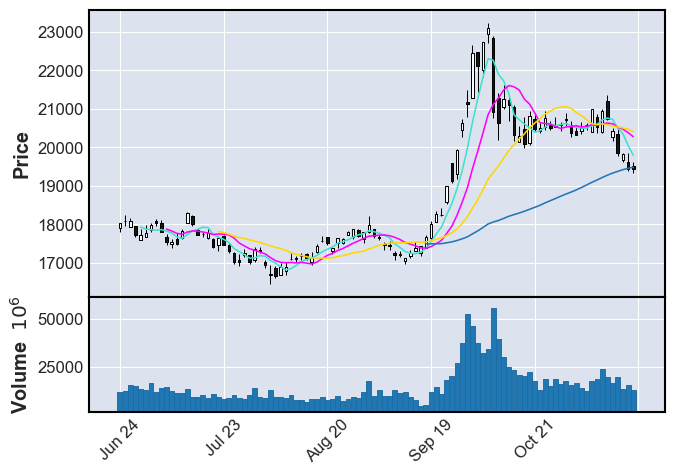

In [7]:
import mplfinance as mpf
import pandas as pd

# plot the stock DataFrame
# df: the DataFrame
# OCHLDict: {'columnName in Oiginal DF':'standard OCHLV names (initial capital)'}
def plotStock(df,OCHLVDict):
    #column
    gt_ul_index_plot=df.rename(columns=OCHLVDict)
    gt_ul_index_plot['Date']=pd.to_datetime(gt_ul_index_plot['Date'])
    gt_ul_index_plot=gt_ul_index_plot.set_index('Date')
    mpf.plot(gt_ul_index_plot,type='candle',volume=True,mav=(5,10,20,60,120,250))

#plot sina stock chart
def plotSinaStock(df,days):
    OCHLVDict={}
    for key in df.columns.to_list():
        new_key = key[0].upper() + key[1:].lower()
        OCHLVDict[key] = new_key
    plotStock(df.tail(days),OCHLVDict)
    
plotSinaStock(stock_hk_daily_hfq_df,100)

#### 2.1.2 美国道琼斯

In [8]:
stock_dji_daily_df = ak.stock_us_daily(symbol=".DJI", adjust="")
stock_dji_daily_df

,date,open,high,low,close,volume
0,2004-01-02,10452.7402,10554.9600,10367.4102,10409.8496,168890000.0
1,2004-01-05,10411.8496,10575.9199,10411.8496,10544.0703,221290000.0
2,2004-01-06,10543.8496,10584.0703,10454.3701,10538.6602,191460000.0
3,2004-01-07,10535.4600,10587.5498,10432.0000,10529.0303,225490000.0
4,2004-01-08,10530.0703,10651.9902,10480.5898,10592.4404,237770000.0
...,...,...,...,...,...,...
5252,2024-11-11,44057.6484,44486.6992,44057.6484,44293.1289,451949024.0
5253,2024-11-12,44359.2109,44405.7305,43887.2695,43910.9805,482720587.0
5254,2024-11-13,43880.4609,44141.3281,43829.9805,43958.1914,518842039.0
5255,2024-11-14,44032.3789,44080.7812,43704.8203,43750.8594,545093598.0


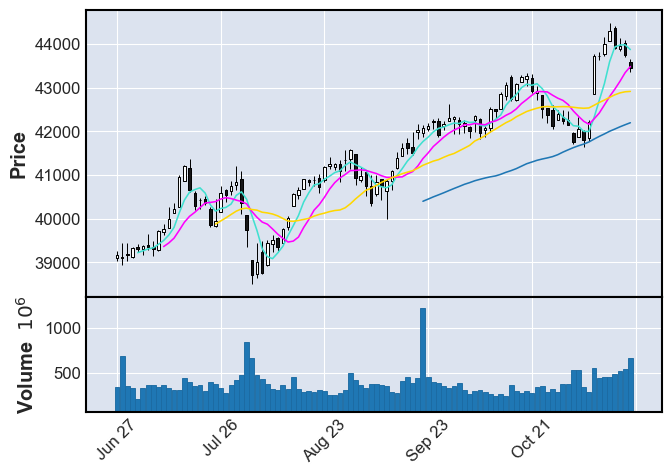

In [9]:
plotSinaStock(stock_dji_daily_df,100)

#### 2.1.3 美国纳斯达克

In [10]:
stock_nasdaq_daily_df = ak.stock_us_daily(symbol=".IXIC", adjust="")
stock_nasdaq_daily_df

,date,open,high,low,close,volume
0,2004-01-02,2011.0800,2022.3700,1999.7700,2006.6801,1.666780e+09
1,2004-01-05,2020.7800,2047.3600,2020.7800,2047.3600,2.362910e+09
2,2004-01-06,2044.5500,2061.5400,2039.6300,2057.3701,2.273220e+09
3,2004-01-07,2056.7500,2078.0901,2047.0200,2077.6799,2.294280e+09
4,2004-01-08,2089.6001,2100.2500,2078.0500,2100.2500,2.683950e+09
...,...,...,...,...,...,...
5250,2024-11-11,19355.3379,19366.0684,19193.2871,19298.7637,7.185259e+09
5251,2024-11-12,19289.8145,19343.0449,19168.5234,19281.4004,6.935192e+09
5252,2024-11-13,19286.4570,19358.4824,19191.1270,19230.7402,8.799507e+09
5253,2024-11-14,19256.0898,19275.8047,19073.3926,19107.6504,7.946575e+09


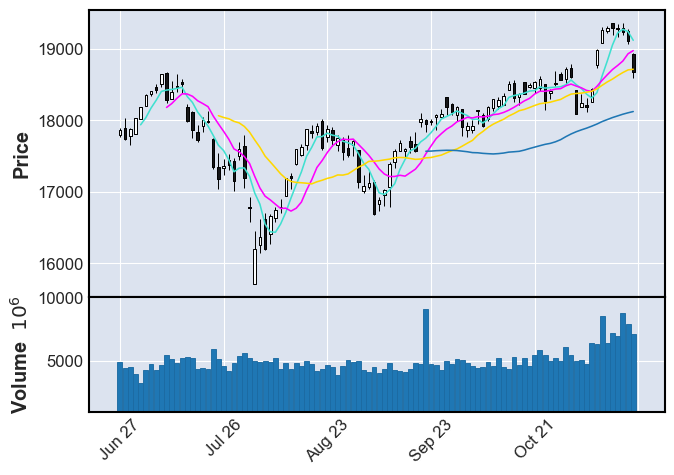

In [11]:
plotSinaStock(stock_nasdaq_daily_df,100)

### 2.2 股指期货市场

#### 中证50期货指数

In [12]:
futures_zh_daily_sina_df = ak.futures_zh_daily_sina(symbol="RB0")
futures_zh_daily_sina_df

,date,open,high,low,close,volume,hold,settle
0,2009-03-27,3550.0,3663.0,3513.0,3561.0,354590,45548,0.0
1,2009-03-30,3550.0,3580.0,3528.0,3544.0,145168,48380,0.0
2,2009-03-31,3538.0,3566.0,3531.0,3549.0,70592,44714,0.0
3,2009-04-01,3560.0,3561.0,3543.0,3547.0,28100,42076,0.0
4,2009-04-02,3545.0,3548.0,3456.0,3473.0,235446,68888,0.0
...,...,...,...,...,...,...,...,...
3793,2024-11-11,3348.0,3388.0,3307.0,3331.0,2744850,1832000,3342.0
3794,2024-11-12,3333.0,3353.0,3308.0,3344.0,2032597,1817779,3328.0
3795,2024-11-13,3344.0,3367.0,3323.0,3337.0,1899234,1761405,3344.0
3796,2024-11-14,3345.0,3350.0,3304.0,3313.0,1803371,1804836,3326.0


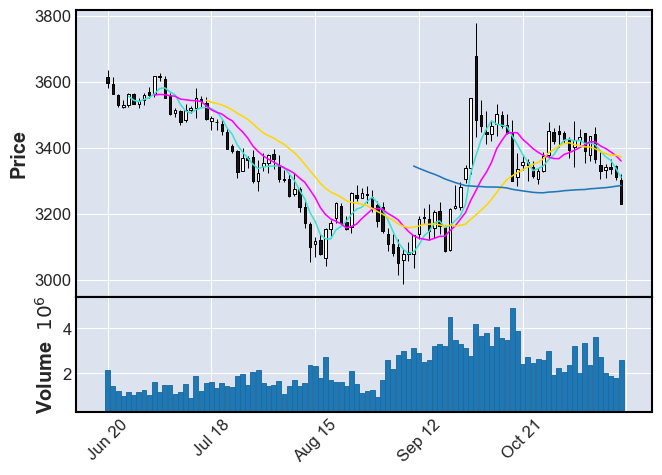

In [13]:
plotSinaStock(futures_zh_daily_sina_df,100)

### 2.3 期权市场

## 3. 板块热点
### 2.1 昨日热点10大板块
昨天涨停股票分布的板块

In [14]:
stock_zt_pool_em_df = ak.stock_zt_pool_em(date=lastday)
stock_zt_pool_em_df

,序号,代码,名称,涨跌幅,最新价,成交额,流通市值,总市值,换手率,封板资金,首次封板时间,最后封板时间,炸板次数,涨停统计,连板数,所属行业
0,1,000536,华映科技,10.000000,7.37,191585479,2.036392e+10,2.038566e+10,0.940809,702464813,092500,092500,0,8/8,8,光学光电
1,2,000795,英洛华,10.055248,9.96,115260905,1.129149e+10,1.129149e+10,1.020776,636833635,092500,092500,0,4/4,4,小金属
2,3,002765,蓝黛科技,10.047281,9.31,78262653,5.547563e+09,6.071313e+09,1.410757,514383086,092500,092500,0,4/4,4,光学光电
3,4,000415,渤海租赁,9.925558,4.43,69550787,2.388972e+10,2.739743e+10,0.291133,307247292,092500,092500,0,4/4,4,多元金融
4,5,002995,天地在线,10.000000,22.33,103701011,2.510276e+09,3.962559e+09,4.131060,87666686,092500,092500,0,4/2,1,文化传媒
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,181,836263,中航泰达,29.939396,10.72,168887107,1.096367e+09,1.500371e+09,16.684364,12238155,143711,143711,0,1/1,1,环保行业
181,182,839725,惠丰钻石,29.977221,28.53,322410688,1.200479e+09,2.604076e+09,31.437162,4058991,144223,145359,3,2/2,2,非金属材
182,183,688512,慧智微-U,20.043812,10.96,294655296,2.947533e+09,5.049957e+09,10.768298,23660261,144336,144639,1,1/1,1,半导体
183,184,605376,博迁新材,10.011291,29.23,486876064,7.646568e+09,7.646568e+09,6.642260,17909221,145440,145440,0,1/1,1,小金属


In [15]:
#返回当日涨停股票DataFrame
def limitupList(date):
    collist=['所属行业','代码','名称','涨跌幅','首次封板时间','最后封板时间','炸板次数','涨停统计','连板数']
    stock_zt_pool_em_df = ak.stock_zt_pool_em(date=date)
    last_hs_10=stock_zt_pool_em_df[collist]
    return last_hs_10

last_hs_10=limitupList(lastday)
last_hs_10

,所属行业,代码,名称,涨跌幅,首次封板时间,最后封板时间,炸板次数,涨停统计,连板数
0,光学光电,000536,华映科技,10.000000,092500,092500,0,8/8,8
1,商业百货,002416,爱施德,10.005653,092500,102206,1,6/6,6
2,小金属,000795,英洛华,10.055248,092500,092500,0,4/4,4
3,光学光电,002765,蓝黛科技,10.047281,092500,092500,0,4/4,4
4,多元金融,000415,渤海租赁,9.925558,092500,092500,0,4/4,4
...,...,...,...,...,...,...,...,...,...
180,环保行业,836263,中航泰达,29.939396,143711,143711,0,1/1,1
181,非金属材,839725,惠丰钻石,29.977221,144223,145359,3,2/2,2
182,半导体,688512,慧智微-U,20.043812,144336,144639,1,1/1,1
183,小金属,605376,博迁新材,10.011291,145440,145440,0,1/1,1


热点追踪：涨停行业汇总明细

In [16]:
grouped_df=last_hs_10.groupby('所属行业',observed=False).size().reset_index(name='计数')
grouped_df['占比']=grouped_df['计数']/grouped_df['计数'].sum()

sort_df=grouped_df.sort_values(by='计数', ascending=False)
sort_df.head(20)

,所属行业,计数,占比
52,软件开发,15,0.081081
24,房地产开,10,0.054054
31,汽车零部,9,0.048649
7,光学光电,8,0.043243
45,航天航空,7,0.037838
23,工程建设,7,0.037838
0,专用设备,6,0.032432
54,通用设备,6,0.032432
18,商业百货,5,0.027027
2,互联网服,5,0.027027


In [17]:
top_10 = sort_df.head(10)
total_cumulative = top_10['占比'].sum()
judge='集中' if total_cumulative>0.5 else '不集中'
print(f'前10板块涨幅靠前累计占比：{total_cumulative}, 热点{judge}。')

前10板块涨幅靠前累计占比：0.42162162162162165, 热点不集中。


### 2.2 今日热点
  
![今日涨幅国泰君安APP](gtja.png)

#### 2.2.1 集合竞价概念板块排名

In [18]:
#记录排名
# basename: 板块类型（概念板块、行业板块）
# start_time, end_time: 排名时间段
# sector: 板块名称
def recordRank(basename,start_time,end_time):
    now = datetime.now()
    tStr = end_time.strftime("%Y%m%d%H%M")
    csvfile=f'{basename}{tStr}.txt'
    if now.time() < end_time and now.time() >= start_time:
        if basename=='conceptRank':
            rank=ak.stock_board_concept_name_em()
        elif basename=='industryRank':
            rank=ak.stock_board_industry_name_em()
        rank.to_csv(csvfile)
    else:
        if os.path.exists(csvfile):
            rank=pd.read_csv(csvfile)
        else:
            print('非指定时间段，没有数据源.')
            rank=pd.DataFrame()
    if not rank.empty:
        mvtotal=rank['总市值'].sum()
        rank['市值比']=rank['总市值']/mvtotal
        rank['上涨家数%']=rank['上涨家数']/(rank['上涨家数']+rank['下跌家数'])
        columns=['排名','板块名称','板块代码','涨跌幅','市值比','换手率','上涨家数%','领涨股票','领涨股票-涨跌幅']
        rank=rank[columns]
    return rank

#排名靠前的板块的股票明细排名
# sectorRankDf: 板块排名DataFrame(recordRank生成)
# sectorNum,stockNum: 返回板块数、股票数
def top5sectorStocks(basename,start_time,end_time,sectorRankDf,sectorNum=5,stockNum=5):
    top5={}
    now = datetime.now()
    tStr = start_time.strftime("%Y%m%d%H%M")
    if sectorRankDf.empty:
        print('非指定时间段，没有数据源。')
    else:
        print('排名前5领涨板块成分股列表。')
        for sym in sectorRankDf['板块名称'].to_list()[:5]:
            csvfile=f'{basename}_{sym}{tStr}.txt'
            if now.time() < end_time and now.time() >= start_time:
                if basename=='conceptRank':
                    top5[sym]=ak.stock_board_concept_cons_em(sym)
                else:
                    top5[sym]=ak.stock_board_industry_cons_em(sym)
                top5[sym].to_csv(csvfile)
            else:
                if os.path.exists(csvfile):
                    top5[sym]=pd.read_csv(csvfile)
                else:
                    print('No record stored and not available from source.')
                    top5[sym]=pd.DataFrame()

            if not top5[sym].empty:
                atotal=top5[sym]['成交额'].sum()
                top5[sym]['成交额比']=top5[sym]['成交额']/atotal
                columns=['代码','名称','涨跌幅','成交额','换手率','市盈率-动态','市净率']
                top5[sym]=top5[sym][columns][:stockNum]
                print(f'板块：{sym}:\n{top5[sym]}\n\n')
    return top5   

In [19]:
#当天集合竞价阶段概念板块排名
basename='conceptRank'
start_time = time(9, 15)
end_time = time(9, 31)
rank0=recordRank(basename,start_time,end_time)
rank0.head(20)

非指定时间段，没有数据源.


""


In [20]:
top5_concept_stocks=top5sectorStocks(basename,start_time,end_time,rank0)

非指定时间段，没有数据源。


#### 2.2.3 开盘后15分钟概念板块排名

In [21]:
start_time = time(9, 31)
end_time = time(9, 52)
rank1=recordRank(basename,start_time,end_time)
rank1.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,昨日连板_含一字,BK1051,6.46,0.000641,2.18,0.915493,渤海租赁,9.93
1,2,昨日连板,BK0816,5.38,0.000487,2.26,0.883721,黑芝麻,9.98
2,3,昨日涨停_含一字,BK1050,4.42,0.001914,3.04,0.723502,中信海直,10.00
3,4,昨日涨停,BK0815,3.82,0.001765,3.15,0.686486,中信海直,10.00
4,5,固态电池,BK0968,3.25,0.002925,0.94,0.858065,紫江企业,10.03
5,6,钠离子电池,BK0988,2.51,0.001244,0.97,0.800000,上海洗霸,10.01
6,7,飞行汽车(eVTOL),BK1157,2.29,0.000427,1.97,0.830508,中信海直,10.00
7,8,刀片电池,BK0951,2.18,0.000647,1.46,0.769231,紫江企业,10.03
8,9,通用航空,BK0625,2.13,0.000782,1.15,0.560976,中信海直,10.00
9,10,动力电池回收,BK1052,2.06,0.000467,1.02,0.594595,华友钴业,10.01


排名前5概念板块领涨成分股

In [22]:
top5_concept_stocks=top5sectorStocks(basename,start_time,end_time,rank1)

排名前5领涨板块成分股列表。
板块：昨日连板_含一字:
       代码    名称    涨跌幅           成交额    换手率   市盈率-动态   市净率
0  830896  旺成科技  23.08  2.144649e+08  21.85    75.65  5.46
1  831726   朱老六  21.21  1.456266e+08   9.04   127.64  6.74
2  688656   浩欧博  20.00  2.960711e+07   0.59   141.99  6.24
3  688660  电气风电  19.85  9.352375e+08   7.44   -19.89  2.34
4  300377   赢时胜  12.09  3.322394e+09  18.29 -1111.61  6.95


板块：昨日连板:
       代码    名称    涨跌幅           成交额    换手率   市盈率-动态   市净率
0  831726   朱老六  21.05  1.487879e+08   9.23   127.47  6.73
1  688660  电气风电  19.60  9.433330e+08   7.50   -19.85  2.34
2  300377   赢时胜  13.11  3.347503e+09  18.43 -1121.74  7.01
3  603366  日出东方  10.02  1.579042e+08   3.31    53.77  1.21
4  601727  上海电气  10.00  3.438607e+08   0.25   166.11  3.14


板块：昨日涨停_含一字:
       代码    名称    涨跌幅           成交额    换手率  市盈率-动态    市净率
0  837006  晟楠科技  29.98  3.844217e+07   3.39  189.32   9.27
1  830896  旺成科技  21.99  2.154482e+08  21.95   74.98   5.41
2  831726   朱老六  21.21  1.492960e+08   9.26  127.64   6.74
3 

#### 2.2.3 集合竞价行业板块涨跌幅

In [23]:
#当天集合竞价到开盘后30分钟涨跌幅排名
basename='industryRank'
start_time = time(9, 15)
end_time = time(9, 31)
rank3=recordRank(basename,start_time,end_time)
rank3.head(20)

非指定时间段，没有数据源.


""


行业板块中成分股

In [24]:
top5_industry_stocks=top5sectorStocks(basename,start_time,end_time,rank3)

非指定时间段，没有数据源。


#### 2.2.4 开盘15分钟行业板块涨跌幅

In [25]:
basename='industryRank'
start_time = time(9, 31)
end_time = time(9, 51)
rank4=recordRank(basename,start_time,end_time)
rank4.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,能源金属,BK1015,5.86,0.003764,1.69,1.000000,华友钴业,10.01
1,2,电池,BK1033,5.13,0.021220,1.32,1.000000,丰元股份,10.02
2,3,航天航空,BK0480,2.60,0.010969,1.75,0.613636,晨曦航空,20.00
3,4,风电设备,BK1032,2.32,0.003246,1.29,0.821429,电气风电,19.72
4,5,软件开发,BK0737,2.21,0.022856,1.94,0.824468,延华智能,10.00
5,6,电机,BK1030,2.03,0.001897,1.55,0.692308,科力尔,9.98
6,7,仪器仪表,BK0458,1.23,0.002897,1.49,0.600000,禾信仪器,20.01
7,8,互联网服务,BK0447,1.20,0.016933,1.57,0.760563,中新赛克,10.00
8,9,航空机场,BK0420,1.20,0.007182,0.37,0.214286,中信海直,10.00
9,10,非金属材料,BK1020,1.04,0.003819,1.13,0.593750,东方碳素,11.36


行业板块中成分股

In [26]:
top5_industry_stocks=top5sectorStocks(basename,start_time,end_time,rank4)

排名前5领涨板块成分股列表。
板块：能源金属:
       代码    名称    涨跌幅           成交额   换手率  市盈率-动态   市净率
0  300618  寒锐钴业  14.69  8.007421e+08  6.44   64.84  2.71
1  603799  华友钴业  10.01  1.330086e+09  2.16   15.75  1.85
2  301219  腾远钴业   9.47  4.214047e+08  4.45   20.48  1.96
3  300390  天华新能   6.43  3.871613e+08  2.24   17.55  1.81
4    2466  天齐锂业   5.46  9.816741e+08  1.72   -8.46  1.48


板块：电池:
       代码    名称    涨跌幅           成交额    换手率  市盈率-动态   市净率
0  688275  万润新能  19.88  3.108884e+08   7.33   -8.16  1.10
1  873152  天宏锂电  19.85  8.265517e+07   9.77  311.79  6.27
2  301121  紫建电子  16.33  2.632387e+08  12.03   61.14  2.64
3  835185   贝特瑞  14.35  1.399036e+08   0.46   36.18  2.73
4  831627  力王股份  12.68  8.845979e+07   8.72   79.79  4.68


板块：航天航空:
       代码    名称    涨跌幅           成交额    换手率   市盈率-动态    市净率
0  837006  晟楠科技  29.98  3.866492e+07   3.41   189.32   9.27
1  300581  晨曦航空  20.00  1.678403e+08   2.02  -251.09   8.31
2  301586   佳力奇  14.01  3.680146e+08  25.36    59.48   4.98
3     697  炼石航空  10.04  1.

板块：软件开发:
       代码    名称    涨跌幅           成交额    换手率   市盈率-动态    市净率
0  835508  殷图网联  29.96  7.445313e+07  10.18  -141.37   7.66
1  832171  志晟信息  21.84  1.976771e+08  15.11   -41.71   7.81
2  301592  六九一二  20.00  8.155284e+08  31.27   686.78  12.39
3  300377   赢时胜  18.50  3.463988e+09  19.06 -1175.21   7.35
4  834415  恒拓开源  15.98  3.238354e+08  10.45   295.65   7.68




### 2.2.5 集合竞价阶段涨停个股热点明细

In [27]:
def stockLimitUp(start_time,end_time):
    now = datetime.now()
    tStr = end_time.strftime("%Y%m%d%H%M")
    csvfile=f'limitUp{tStr}.txt'
    if now.time() < end_time and now.time() >= start_time:
        rank=ak.stock_zh_a_spot_em()
        rank.to_csv(csvfile)
    else:
        if os.path.exists(csvfile):
            rank=pd.read_csv(csvfile)
        else:
            print('No record stored and not available from source.')
            rank=pd.DataFrame()
    if not rank.empty:
        columns=['代码','名称','涨跌幅','量比','换手率','市盈率-动态','市净率','流通市值','涨速','5分钟涨跌','60日涨跌幅','年初至今涨跌幅']
        rank=rank[columns].sort_values(by='涨跌幅', ascending=False)
    return rank

In [28]:
start_time = time(9, 15)
end_time = time(9, 31)
openA = stockLimitUp(start_time,end_time)
openA.head(50)

No record stored and not available from source.


""


### 2.2.6 开盘15分钟涨停个股热点明细


In [29]:
start_time = time(9, 31)
end_time = time(9, 53)
open15 = stockLimitUp(start_time,end_time)
open15.head(50)

,代码,名称,涨跌幅,量比,换手率,市盈率-动态,市净率,流通市值,涨速,5分钟涨跌,60日涨跌幅,年初至今涨跌幅
0,833284,灵鸽科技,30.00,11.90,16.54,-171.02,4.52,6.757082e+08,0.00,0.00,170.34,4.40
2,837006,晟楠科技,29.98,2.87,3.41,189.32,9.27,1.133766e+09,0.00,0.00,210.65,100.74
1,833346,威贸电子,29.98,7.32,14.83,72.35,6.77,9.905280e+08,0.00,0.00,211.94,124.20
3,835508,殷图网联,29.96,16.89,10.18,-141.37,7.66,7.657629e+08,0.00,0.00,126.23,119.81
4,838227,美登科技,29.85,15.50,9.22,45.09,4.68,8.494625e+08,-0.10,11.37,143.31,63.72
5,871642,通易航天,20.10,22.69,14.68,-109.16,8.39,1.853007e+09,4.25,-1.08,156.62,31.33
6,300484,蓝海华腾,20.01,8.38,7.09,158.39,6.88,3.489315e+09,0.00,0.00,55.76,70.25
7,688622,禾信仪器,20.01,57.84,5.00,-101.64,7.24,3.002197e+09,0.00,0.00,170.60,19.30
8,301592,六九一二,20.00,16.20,31.27,686.78,12.39,2.688875e+09,0.00,0.00,421.02,421.02
9,300581,晨曦航空,20.00,7.81,2.02,-251.09,8.31,8.317656e+09,0.00,0.00,92.61,53.97


#### 2.2.7 板块动态评析

本轮行情启动股票热点追踪（需要从历史行情中组合分析，现有股票涨停池昨日和今日都不稳定）

In [30]:
from datetime import datetime, timedelta

def get_stock_zt_pool(start_date, end_date):
    current_date = datetime.strptime(start_date, '%Y%m%d')
    end_date = datetime.strptime(end_date, '%Y%m%d')
    
    concat_zt_df = pd.DataFrame()

    while current_date <= end_date:
        date_str = current_date.strftime('%Y%m%d')
        try:
            stock_zt_pool_strong_em_df = ak.stock_zt_pool_previous_em(date=date_str)
            stock_zt_pool_strong_em_df['日期'] = pd.to_datetime(date_str)
            concat_zt_df = pd.concat([concat_zt_df, stock_zt_pool_strong_em_df], ignore_index=True)
        except Exception as e:
            print(f"Error fetching data for {date_str}: {e}")
        
        current_date += timedelta(days=1)
    
    return concat_zt_df

In [31]:
syclestart='20240925'
#ak.stock_zt_pool_strong_em(date=syclestart)

In [32]:
#本轮行情启动日
syclestart='20240924'
result_df = get_stock_zt_pool(syclestart, lastday)
result_df

Error fetching data for 20240924: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20240925: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20240926: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20240927: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20240928: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20240929: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20240930: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241001: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20241002: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241003: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20241004: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241005: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20241006: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241007: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20241008: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241009: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20241010: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241011: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20241012: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241013: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20241014: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241015: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20241016: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241017: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20241018: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241019: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20241020: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241021: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20241022: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241023: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20241024: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241025: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20241026: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241027: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20241028: Length mismatch: Expected axis has 1 elements, new values have 17 elements


Error fetching data for 20241102: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241103: Length mismatch: Expected axis has 1 elements, new values have 17 elements


,序号,代码,名称,涨跌幅,最新价,涨停价,成交额,流通市值,总市值,换手率,涨速,振幅,昨日封板时间,昨日连板数,涨停统计,所属行业,日期
0,1,002077,大港股份,-4.580153,15.00,17.29,1328869104,8.705228e+09,8.705228e+09,14.901611,0.874243,7.569975,095524,1,2/1,半导体,2024-10-29
1,2,839493,并行科技,6.547174,85.60,104.44,1074715008,2.224365e+09,4.984488e+09,43.884777,0.694036,19.902914,144333,1,2/1,软件开发,2024-10-29
2,3,603021,山东华鹏,-4.306220,6.00,6.90,393258640,1.919688e+09,1.919688e+09,18.400848,0.671141,16.108454,093433,7,8/7,玻璃玻纤,2024-10-29
3,4,600231,凌钢股份,-5.050505,1.88,2.18,143241753,5.300067e+09,5.362069e+09,2.636886,0.534759,8.080808,130041,1,2/1,钢铁行业,2024-10-29
4,5,839273,一致魔芋,19.644724,22.90,24.88,193310251,7.526829e+08,1.688967e+09,26.723440,0.350570,26.280043,111318,1,2/1,食品饮料,2024-10-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,149,600503,华丽家族,1.945525,2.62,2.83,391938752,4.198000e+09,4.198000e+09,9.327408,-0.380228,9.338521,110942,1,2/1,房地产开,2024-11-05
883,150,003016,欣贺股份,-0.515464,7.72,8.54,154142096,3.294746e+09,3.308187e+09,4.647283,-0.515464,4.768041,094254,1,2/1,纺织服装,2024-11-05
884,151,000692,惠天热电,1.851852,3.85,4.16,253120290,2.051407e+09,2.051407e+09,12.462040,-0.516796,5.820106,093515,1,2/1,公用事业,2024-11-05
885,152,600192,长城电工,-1.583114,7.46,8.34,399805584,3.295440e+09,3.295440e+09,12.036198,-0.665779,8.970977,093532,1,2/1,电网设备,2024-11-05


## 4.个股市场


### 4.1 跟进股票列表
#### 4.1.1 历史K线

In [33]:
def plotDcStockSingle(df,days):
    OCHLVDict={'日期':'Date','开盘':'Open','收盘':'Close','最高':'High','最低':'Low','成交量':'Volume'}
    print(f'{days}K线图')
    plotStock(df.tail(days),OCHLVDict)

In [34]:
#根据代码获取股票信息
#symbol:若是字符串，则返回单个股信息；若是列表，则遍历元素，返回相应列表。
def getStockInfo(symbol):
    if type(symbol).__name__=='str':
        stocknamedf=ak.stock_individual_info_em(symbol=symbol)
        stockname=stocknamedf.loc[stocknamedf['item']=='股票简称','value'][1]
        stockIPO=stocknamedf.loc[stocknamedf['item']=='上市时间','value'][7]
        stockIndustry=stocknamedf.loc[stocknamedf['item']=='行业','value'][6]
        stockTAmount=stocknamedf.loc[stocknamedf['item']=='总股本','value'][2]
        stockFAmount=stocknamedf.loc[stocknamedf['item']=='流通股','value'][3]
        stockTValue=stocknamedf.loc[stocknamedf['item']=='总市值','value'][4]
        stockFValue=stocknamedf.loc[stocknamedf['item']=='流通市值','value'][5]
    else:
        stockname,stockIPO,stockIndustry,stockTAmount,stockFAmount,stockTValue,stockFValue=[],[],[],[],[],[],[]
        for sym in symbol:
            stocknamedf=ak.stock_individual_info_em(symbol=sym)
            stockname.append(stocknamedf.loc[stocknamedf['item']=='股票简称','value'][1])
            stockIPO.append(stocknamedf.loc[stocknamedf['item']=='上市时间','value'][7])
            stockIndustry.append(stocknamedf.loc[stocknamedf['item']=='行业','value'][6])
            stockTAmount.append(stocknamedf.loc[stocknamedf['item']=='总股本','value'][2])
            stockFAmount.append(stocknamedf.loc[stocknamedf['item']=='流通股','value'][3])
            stockTValue.append(stocknamedf.loc[stocknamedf['item']=='总市值','value'][4])
            stockFValue.append(stocknamedf.loc[stocknamedf['item']=='流通市值','value'][5])
            
    return {'名称':stockname,'IPO':stockIPO,'行业':stockIndustry,'总股本':stockTAmount,'流通股':stockFAmount,'总市值':stockTValue,'流通市值':stockFValue}

#画指定周期的股票烛线图
def plotDcStocks(stocksymb,periods):
    stockDict={}
    for p in periods:
        stockdf = ak.stock_zh_a_hist(symbol=stocksymb,period=p)
        stockname=getStockInfo(stocksymb)['名称']
        stockDict[p]=stockdf
        print(f'{stockname}-周期：{p}\n{stockdf}')
        plotDcStockSingle(stockdf,100)
    stockDict['name']=stockname
    return stockDict

润和软件-周期：daily
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     2012-07-18  300339  28.00  23.90  28.00  23.21   150973  3.772116e+08   
1     2012-07-19  300339  24.40  24.07  25.30  23.71    93127  2.276391e+08   
2     2012-07-20  300339  24.00  24.19  24.78  23.92    61087  1.484579e+08   
3     2012-07-23  300339  23.51  23.20  23.59  21.78    60498  1.371628e+08   
4     2012-07-24  300339  23.60  25.52  25.52  23.50    81850  2.034769e+08   
...          ...     ...    ...    ...    ...    ...      ...           ...   
2841  2024-11-12  300339  75.20  72.23  75.49  71.60  1267734  9.233616e+09   
2842  2024-11-13  300339  71.70  72.86  75.60  70.51  1080377  7.915981e+09   
2843  2024-11-14  300339  71.87  70.39  74.99  70.01   939891  6.777883e+09   
2844  2024-11-15  300339  70.34  65.01  71.80  64.77  1249074  8.473638e+09   
2845  2024-11-18  300339  66.80  62.86  67.50  62.60   330771  2.131971e+09   

         振幅    涨跌幅   涨跌额    换手率  
0  

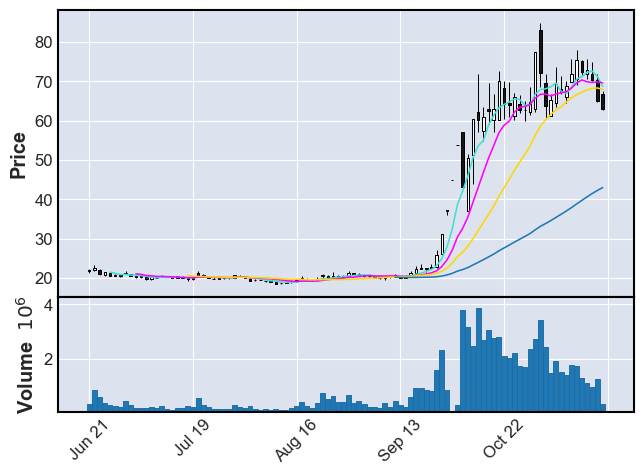

润和软件-周期：weekly
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    2012-07-20  300339  28.00  24.19  28.00  23.21    305187  7.533086e+08   
1    2012-07-27  300339  23.51  24.80  27.00  21.78    379070  9.502016e+08   
2    2012-08-03  300339  24.30  23.72  25.17  22.02    178747  4.147968e+08   
3    2012-08-10  300339  23.41  24.92  25.57  23.20    155756  3.791379e+08   
4    2012-08-17  300339  24.80  24.76  25.90  24.06     87260  2.188727e+08   
..          ...     ...    ...    ...    ...    ...       ...           ...   
600  2024-10-25  300339  60.20  62.59  72.58  60.01  10846762  7.096691e+10   
601  2024-11-01  300339  62.66  63.58  84.84  60.00  12543368  8.772990e+10   
602  2024-11-08  300339  61.18  71.80  75.50  61.18   8065544  5.524827e+10   
603  2024-11-15  300339  70.60  65.01  78.00  64.77   6260951  4.514303e+10   
604  2024-11-18  300339  66.80  62.87  67.50  62.60    330955  2.133128e+09   

        振幅    涨跌幅   涨跌额     换手率  
0 

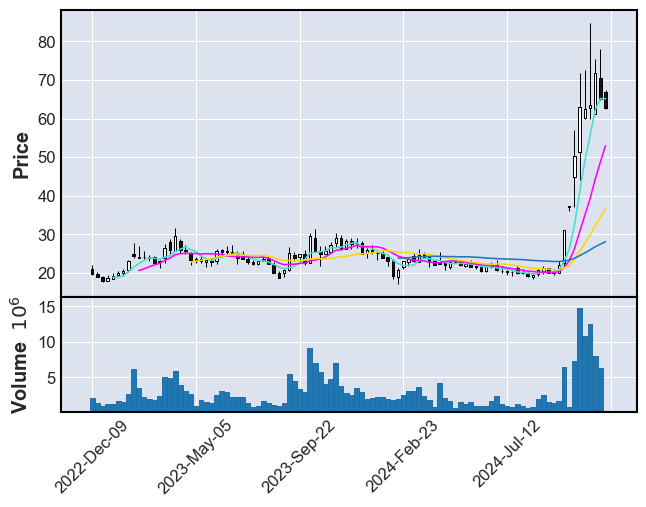

润和软件-周期：monthly
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    2012-07-31  300339  28.00  22.20  28.00  21.78    769468  1.904240e+09   
1    2012-08-31  300339  22.05  26.35  27.88  22.02    518439  1.285591e+09   
2    2012-09-28  300339  26.25  24.40  29.16  23.64    259629  6.996420e+08   
3    2012-10-31  300339  24.40  25.38  26.60  23.70     99730  2.513733e+08   
4    2012-11-30  300339  25.38  20.70  26.10  20.10     73468  1.762272e+08   
..          ...     ...    ...    ...    ...    ...       ...           ...   
140  2024-07-31  300339  20.60  20.66  21.89  19.24   4915497  1.005085e+10   
141  2024-08-30  300339  20.51  21.24  21.76  18.47   6279256  1.266894e+10   
142  2024-09-30  300339  21.20  37.37  37.37  19.48  11942154  2.945327e+10   
143  2024-10-31  300339  44.84  72.00  84.84  36.99  43109486  2.690822e+11   
144  2024-11-18  300339  69.50  62.87  78.00  60.29  17064443  1.182074e+11   

         振幅    涨跌幅    涨跌额     换手率  

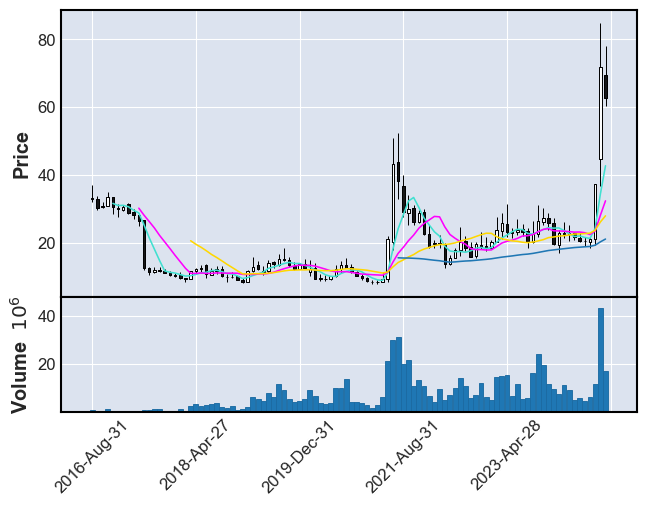

In [35]:
stocksymb='300339'
periods=['daily','weekly','monthly']
stockDict=plotDcStocks(stocksymb,periods)

### 4.1.2 盘口信息汇总
#### 4.1.2.1 成交和挂单明细
获取腾讯当日历史分笔数据

In [36]:
# 根据code代码返回“交易所+代码” 信息，或者反过来
def transferExSym(code):
    if len(code)>6:
        rescode=code[-6:]
    else:
        source={}
        source['sh']=ak.stock_sh_a_spot_em()['代码'].to_list()
        source['sz']=ak.stock_sz_a_spot_em()['代码'].to_list()
        source['bj']=ak.stock_bj_a_spot_em()['代码'].to_list()
        for k in source.keys():
            if code in source[k]:
                rescode=k+code
                break
    return rescode

In [37]:
import numpy as np
import matplotlib.pyplot as plt

#区分北交所和沪深股市，刻画市场深度。按照涨跌停板，作为极值，按照价格涨幅的measure度量区间
def priceMarketDepth(df,measure=0.01):

    open_price = df.loc[df['成交时间'] == '09:30:00', '成交价格'].iloc[0]

    # 设置涨跌停板系数
    if stocksymb == 'bj':
        limit_factor = 0.2
    else:
        limit_factor = 0.1

    # 计算最高价和最低价
    high_price = open_price * (1 + limit_factor)
    low_price = open_price * (1 - limit_factor)

    # 定义价格区间，每1%一档
    price_bins = np.round(np.arange(low_price, high_price, (high_price - low_price) * measure),2)

    # 将价格按照区间划分
    df['价格区间'] = pd.cut(df['成交价格'], bins=price_bins, right=False)

    # 按照价格区间汇总成交量
    volume_summary = df.groupby('价格区间',observed=False)['成交量'].sum().reset_index()

    # 新建 df['prop'] 列
    df['prop'] = df['性质'].apply(lambda x: -1 if x == '卖盘' else (1 if x == '买盘' else 0))
    
    # 按照价格区间汇总成交量和 prop 之和
    summary = df.groupby('价格区间',observed=False).agg({
        '成交量': 'sum',
        'prop': 'sum'
    }).reset_index()
    
    # 提取价格区间的中点和边界
    summary['价格'] = summary['价格区间'].apply(lambda x: round(x.mid,2))
    summary['起始价格'] = summary['价格区间'].apply(lambda x: round(x.left,2))
    summary['终止价格'] = summary['价格区间'].apply(lambda x: round(x.right,2))

    # 分离买盘和卖盘数据
    summary['买盘深度'] = summary['prop'].apply(lambda x: x if x > 0 else 0)
    summary['卖盘深度'] = -summary['prop'].apply(lambda x: -x if x < 0 else 0)

    # 绘制市场深度水平条形图
    fig, ax = plt.subplots(figsize=(14, 21))

    # 绘制买卖盘深度图
    ax.barh(summary['价格'], summary['买盘深度'], color='green', label='buy')
    ax.barh(summary['价格'], summary['卖盘深度'], color='red', label='sell')
    
    # 在图上标注区间价格的起始和终止价格
    for index, row in summary.iterrows():
        ax.text(row['买盘深度'] + max(summary['买盘深度'].max(), summary['卖盘深度'].max())*measure, row['价格'], f'{row["起始价格"]:.2f}', va='center', ha='left', fontsize=8, color='black')
        ax.text(-row['卖盘深度'] - max(summary['买盘深度'].max(), summary['卖盘深度'].max())*measure, row['价格'], f'{row["终止价格"]:.2f}', va='center', ha='right', fontsize=8, color='black')

    # 设置图表标题和标签
    ax.set_title('Market Depth')
    ax.set_xlabel('Depth(Amount)')
    ax.set_ylabel('Price')
    ax.legend()

    
    # 显示图表
    plt.show()
    
    return summary

In [38]:
from rich.console import Console
from rich.table import Table

#美观显示DataFrame表格
class DataFramePretty(object):
    def __init__(self, df: pd.DataFrame, min_max_cols=[]) -> None:
        self.data = df
        self.min_max_cols = min_max_cols

    def __set_min_max_style(self, df: pd.DataFrame):
        imax = self.data.idxmax()
        imin = self.data.idxmin()

        max_tmpl = "[b on red3]{}[/b on red3]"
        min_tmpl = "[i on green3]{}[/i on green3]"

        for col in self.min_max_cols:
            col_idx = imax.index.tolist().index(col)
            val = df.iloc[imax[col], col_idx]
            df.iloc[imax[col], col_idx] = max_tmpl.format(val)

            col_idx = imin.index.tolist().index(col)
            val = df.iloc[imin[col], col_idx]
            df.iloc[imin[col], col_idx] = min_tmpl.format(val)

    def show(self):
        table = Table(
            title="DataFrame",
            title_style="i on dark_cyan",
            header_style="bold cyan",
        )

        # self.data是原始数据
        # df 是用来显示的数据
        df = self.data.copy()
        for col in df.columns:
            df[col] = df[col].astype("str")
            table.add_column(col)

        self.__set_min_max_style(df)

        for idx in range(len(df)):
            table.add_row(*df.iloc[idx].tolist())

        console = Console()
        console.print(table)

In [39]:
#剔除中性单以后，列出活跃买卖市场深度
def plotActiveMarketDepth(stocksymbol):
    
    print(f'市场深度：{stocksymb}')
    #一次性获得历史分笔数据（当天即当天之前的交易时间；隔天即昨天）
    yesterdayTicks=ak.stock_zh_a_tick_tx_js(symbol=transferExSym(stocksymb))
    
    md=priceMarketDepth(yesterdayTicks)
    md = md[(md['买盘深度'] != 0) | (md['卖盘深度'] != 0)]
    mdp=DataFramePretty(md)
    mdp.show()
    return  md

剔除中性盘以后，主动买卖盘的市场深度

市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


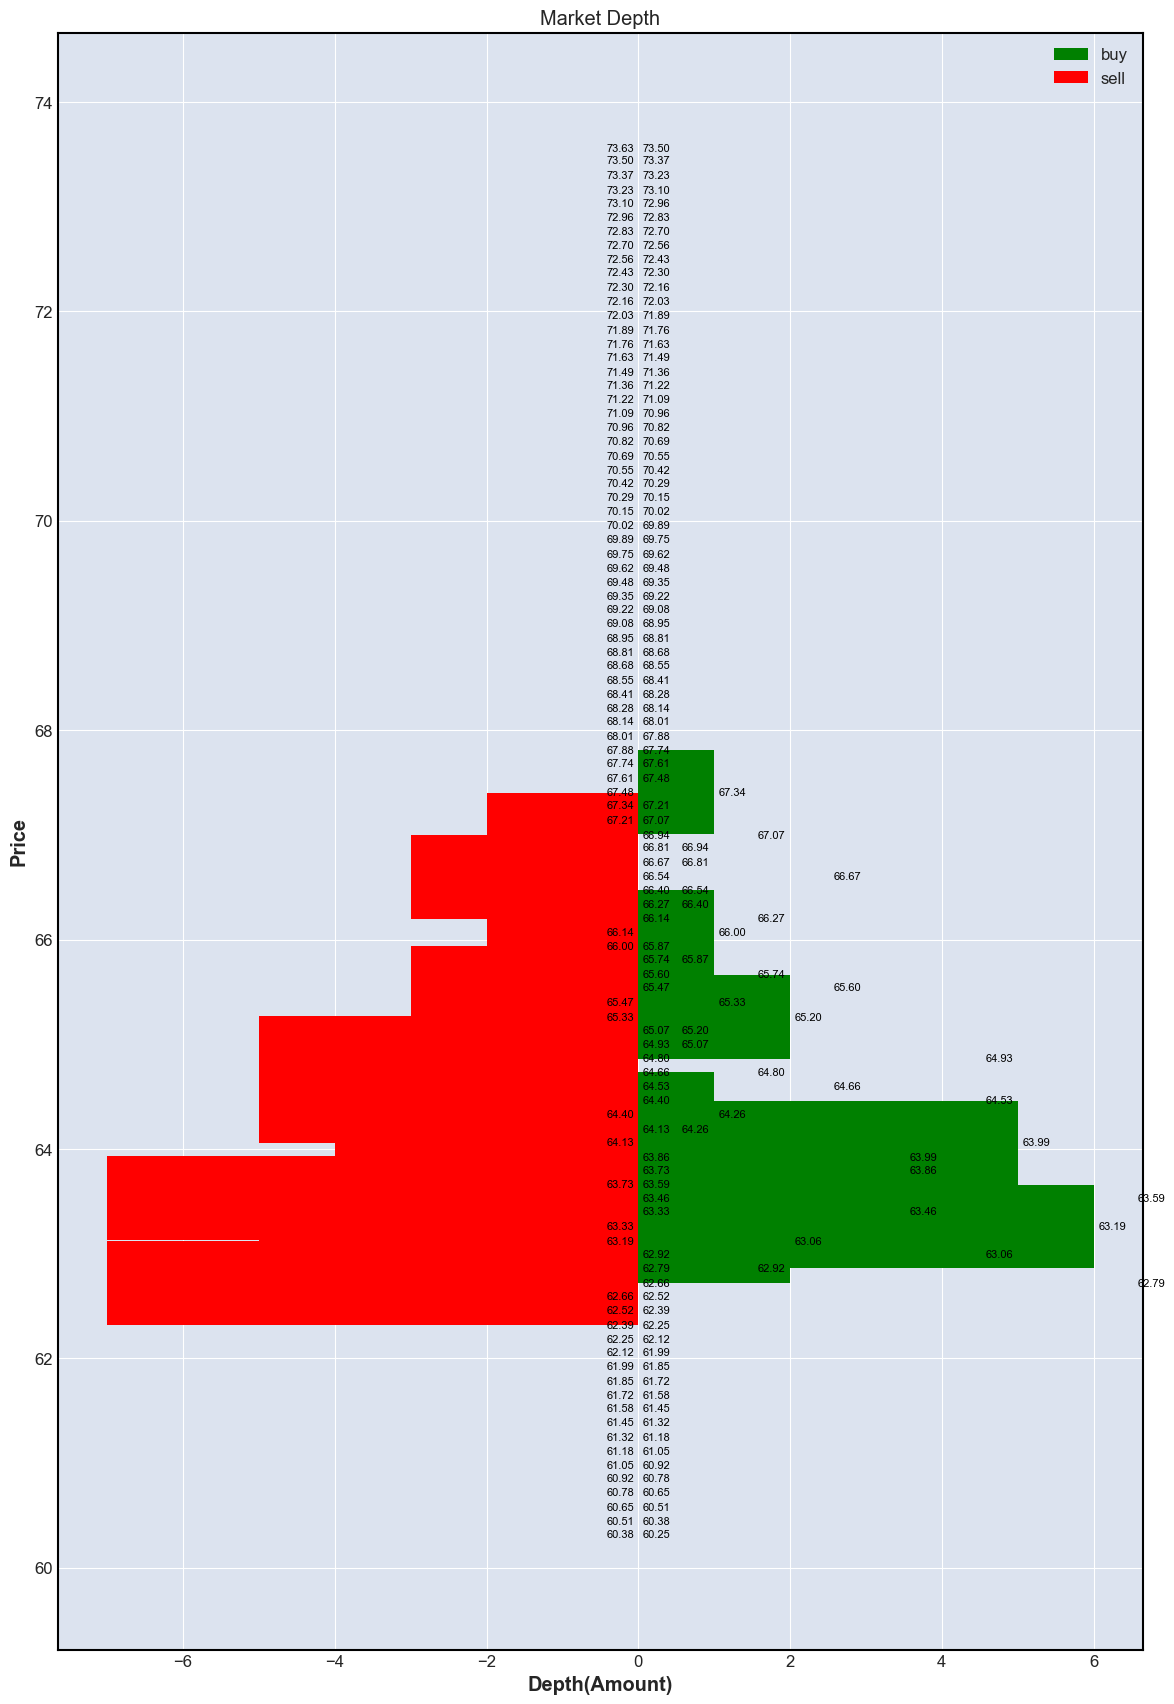

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [62.66, 62.79) │ 6163   │ -7   │ 62.72 │ 62.66    │ 62.79    │ 0        │ -7       │
│ [62.79, 62.92) │ 26459  │ -2   │ 62.86 │ 62.79    │ 62.92    │ 0        │ -2       │
│ [62.92, 63.06) │ 12265  │ -5   │ 62.99 │ 62.92    │ 63.06    │ 0        │ -5       │
│ [63.06, 63.19) │ 15683  │ 2    │ 63.12 │ 63.06    │ 63.19    │ 2        │ 0        │
│ [63.19, 63.33) │ 18156  │ 6    │ 63.26 │ 63.19    │ 63.33    │ 6        │ 0        │
│ [63.33, 63.46) │ 22684  │ -4   │ 63.4  │ 63.33    │ 63.46    │ 0        │ -4       │
│ [63.46, 63.59) │ 18113  │ -7   │ 63.53 │ 63.46    │ 63.59    │ 0        │ -7       │
│ [63.73, 63.86) │ 17297  │ -4   │ 63.8  │ 63.73    │ 63.86    │ 0        │ -4       │
│ [63.86, 63.99) │ 16349  │ -4   │ 63.92 │ 63.86    │ 63.99    │ 0        │ -4       │
│ [63.99, 64.13) │ 22369  │ 5    │ 64.06 │ 63.99    │ 64.13    │ 5        │ 0        │
│ [64.13, 64.26) │ 5782   │ -1   │ 64.19 │ 64.13    │ 64.26    │ 0        │ -1       │
│ [64.26, 64.4)  │ 1898   │ 1    │ 64.33 │ 64.26    │ 64.4     │ 1        │ 0        │
│ [64.4, 64.53)  │ 3723   │ -5   │ 64.46 │ 64.4     │ 64.53    │ 0        │ -5       │
│ [64.53, 64.66) │ 5291   │ -3   │ 64.6  │ 64.53    │ 64.66    │ 0        │ -3       │
│ [64.66, 64.8)  │ 5279   │ -2   │ 64.73 │ 64.66    │ 64.8     │ 0        │ -2       │
│ [64.8, 64.93)  │ 3071   │ -5   │ 64.87 │ 64.8     │ 64.93    │ 0        │ -5       │
│ [64.93, 65.07) │ 17103  │ -1   │ 65.0  │ 64.93    │ 65.07    │ 0        │ -1       │
│ [65.07, 65.2)  │ 12211  │ -1   │ 65.13 │ 65.07    │ 65.2     │ 0        │ -1       │
│ [65.2, 65.33)  │ 1877   │ 2    │ 65.26 │ 65.2     │ 65.33    │ 2        │ 0        │
│ [65.33, 65.47) │ 2153   │ 1    │ 65.4  │ 65.33    │ 65.47    │ 1        │ 0        │
│ [65.47, 65.6)  │ 1918   │ -3   │ 65.54 │ 65.47    │ 65.6     │ 0        │ -3       │
│ [65.6, 65.74)  │ 7960   │ -2   │ 65.67 │ 65.6     │ 65.74    │ 0        │ -2       │
│ [65.74, 65.87) │ 4280   │ -1   │ 65.81 │ 65.74    │ 65.87    │ 0        │ -1       │
│ [66.0, 66.14)  │ 9288   │ 1    │ 66.07 │ 66.0     │ 66.14    │ 1        │ 0        │
│ [66.14, 66.27) │ 2404   │ -2   │ 66.2  │ 66.14    │ 66.27    │ 0        │ -2       │
│ [66.27, 66.4)  │ 3212   │ -1   │ 66.34 │ 66.27    │ 66.4     │ 0        │ -1       │
│ [66.4, 66.54)  │ 928    │ -1   │ 66.47 │ 66.4     │ 66.54    │ 0        │ -1       │
│ [66.54, 66.67) │ 2217   │ -3   │ 66.6  │ 66.54    │ 66.67    │ 0        │ -3       │
│ [66.67, 66.81) │ 9247   │ -1   │ 66.74 │ 66.67    │ 66.81    │ 0        │ -1       │
│ [66.81, 66.94) │ 11786  │ -1   │ 66.88 │ 66.81    │ 66.94    │ 0        │ -1       │
│ [66.94, 67.07) │ 19510  │ -2   │ 67.0  │ 66.94    │ 67.07    │ 0        │ -2       │
│ [67.34, 67.48) │ 1830   │ 1    │ 67.41 │ 67.34    │ 67.48    │ 1        │ 0        │
└────────────────┴────────┴──────┴───────┴──────────┴──────────┴──────────┴──────────┘

,价格区间,成交量,prop,价格,起始价格,终止价格,买盘深度,卖盘深度
18,"[62.66, 62.79)",6163,-7,62.72,62.66,62.79,0,-7
19,"[62.79, 62.92)",26459,-2,62.86,62.79,62.92,0,-2
20,"[62.92, 63.06)",12265,-5,62.99,62.92,63.06,0,-5
21,"[63.06, 63.19)",15683,2,63.12,63.06,63.19,2,0
22,"[63.19, 63.33)",18156,6,63.26,63.19,63.33,6,0
23,"[63.33, 63.46)",22684,-4,63.40,63.33,63.46,0,-4
24,"[63.46, 63.59)",18113,-7,63.53,63.46,63.59,0,-7
26,"[63.73, 63.86)",17297,-4,63.80,63.73,63.86,0,-4
27,"[63.86, 63.99)",16349,-4,63.92,63.86,63.99,0,-4
28,"[63.99, 64.13)",22369,5,64.06,63.99,64.13,5,0


In [40]:
plotActiveMarketDepth(stocksymb)

### 4.1.3 个股追踪
追踪股票列表

In [41]:
focusStocks=['300576','600839','600157','000717','002607','600127','600605','600217','300727','301421','002843','600968','300159','601688']
getInfo=getStockInfo(focusStocks)
Analist=pd.DataFrame({'代码':focusStocks,'名称':getInfo['名称'],'IPO':getInfo['IPO'],'行业':getInfo['行业'],'流通股':getInfo['流通股'],'总股本':getInfo['总股本']})
Analist['流通股']=Analist['流通股'].astype(int)
Analist['总股本']=Analist['总股本'].astype(int)
Analist['流通率']=Analist['流通股']/Analist['总股本']
Analist

,代码,名称,IPO,行业,流通股,总股本,流通率
0,300576,容大感光,20161220,电子化学品,183530814,295708699,0.620647
1,600839,四川长虹,19940311,家电行业,4614958631,4616244222,0.999722
2,600157,永泰能源,19980513,电力行业,22217764145,22217764145,1.000000
3,000717,中南股份,19970508,钢铁行业,2423523840,2423845590,0.999867
4,002607,中公教育,20110810,教育,5028744315,6167399389,0.815375
5,600127,金健米业,19980506,农牧饲渔,641783218,641783218,1.000000
6,600605,汇通能源,19920327,房地产服务,206282429,206282429,1.000000
7,600217,中再资环,19991216,环保行业,1388659782,1657653673,0.837726
8,300727,润禾材料,20171127,化学制品,113888282,127725100,0.891667
9,301421,波长光电,20230823,光学光电子,46308485,115718000,0.400184


容大感光-周期：daily
              日期    股票代码     开盘     收盘     最高     最低     成交量           成交额  \
0     2016-12-20  300576   9.89  11.87  11.87   9.89      84  9.803500e+04   
1     2016-12-21  300576  13.06  13.06  13.06  13.06      20  2.612000e+04   
2     2016-12-22  300576  14.37  14.37  14.37  14.37      11  1.580700e+04   
3     2016-12-23  300576  15.81  15.81  15.81  15.81      35  5.533500e+04   
4     2016-12-26  300576  17.39  17.39  17.39  17.39      39  6.782100e+04   
...          ...     ...    ...    ...    ...    ...     ...           ...   
1906  2024-11-12  300576  59.80  59.16  62.49  58.01  299263  1.789567e+09   
1907  2024-11-13  300576  58.58  59.27  59.55  57.10  190718  1.112797e+09   
1908  2024-11-14  300576  58.71  56.15  58.89  56.10  170326  9.751859e+08   
1909  2024-11-15  300576  56.22  53.52  56.80  53.52  178230  9.822197e+08   
1910  2024-11-18  300576  53.07  51.46  53.99  50.90   51932  2.698599e+08   

         振幅    涨跌幅   涨跌额    换手率  
0     24.03  44

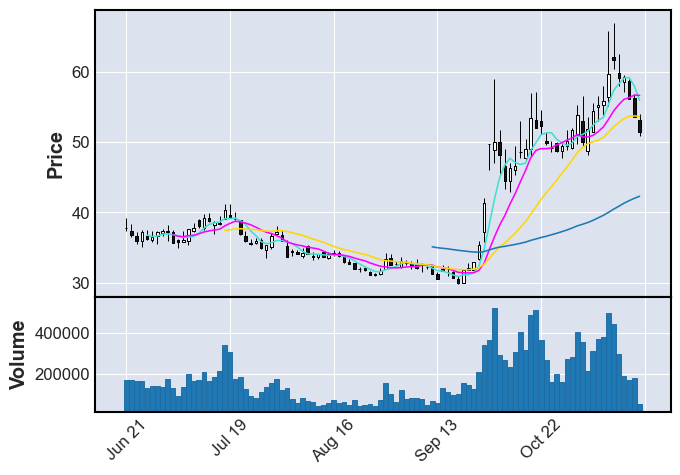

容大感光-周期：weekly
             日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0    2016-12-23  300576   9.89  15.81  15.81   9.89      150  1.952970e+05   
1    2016-12-30  300576  17.39  25.45  25.45  17.39      239  5.274280e+05   
2    2017-01-06  300576  28.00  37.27  37.27  28.00     1382  4.588265e+06   
3    2017-01-13  300576  41.00  44.99  49.00  41.00   274981  1.270494e+09   
4    2017-01-20  300576  44.10  41.00  44.30  38.47   266327  1.094907e+09   
..          ...     ...    ...    ...    ...    ...      ...           ...   
398  2024-10-25  300576  53.19  48.73  57.16  48.60  1506916  7.825647e+09   
399  2024-11-01  300576  48.75  50.02  56.56  47.76  1481663  7.649311e+09   
400  2024-11-08  300576  48.71  59.60  65.80  48.20  1778161  9.926174e+09   
401  2024-11-15  300576  62.10  53.52  66.96  53.52  1284336  7.678084e+09   
402  2024-11-18  300576  53.07  51.46  53.99  50.90    51932  2.698599e+08   

        振幅    涨跌幅    涨跌额     换手率  
0    71.84  9

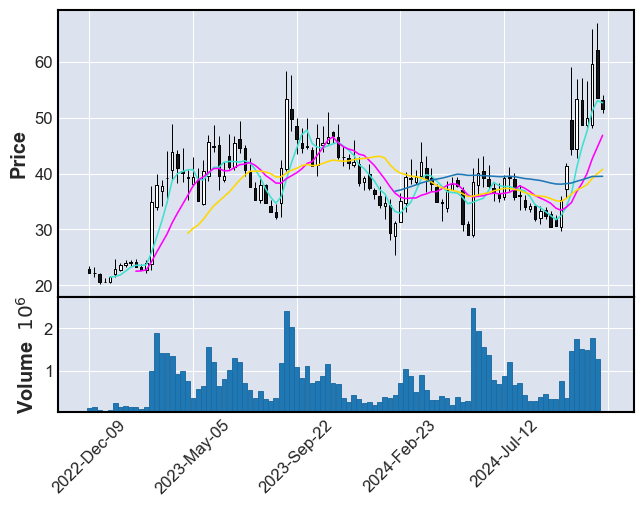

容大感光-周期：monthly
            日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0   2016-12-30  300576   9.89  25.45  25.45   9.89      389  7.227250e+05   
1   2017-01-26  300576  28.00  41.80  49.00  28.00   645691  2.793503e+09   
2   2017-02-28  300576  42.00  46.25  46.48  40.60   577638  2.535418e+09   
3   2017-03-31  300576  46.23  44.79  52.50  44.40   625741  3.038817e+09   
4   2017-04-28  300576  43.99  40.30  46.98  36.08   185168  7.561082e+08   
..         ...     ...    ...    ...    ...    ...      ...           ...   
91  2024-07-31  300576  36.57  36.60  41.20  33.53  3828562  1.447531e+10   
92  2024-08-30  300576  36.96  33.38  38.00  30.90  1650007  5.620156e+09   
93  2024-09-30  300576  33.45  41.38  41.97  29.78  2197749  7.319578e+09   
94  2024-10-31  300576  49.66  53.82  58.98  42.87  5840792  2.935311e+10   
95  2024-11-18  300576  53.00  51.46  66.96  48.20  3472124  1.978614e+10   

        振幅     涨跌幅    涨跌额     换手率  
0   188.83  208.86  17.

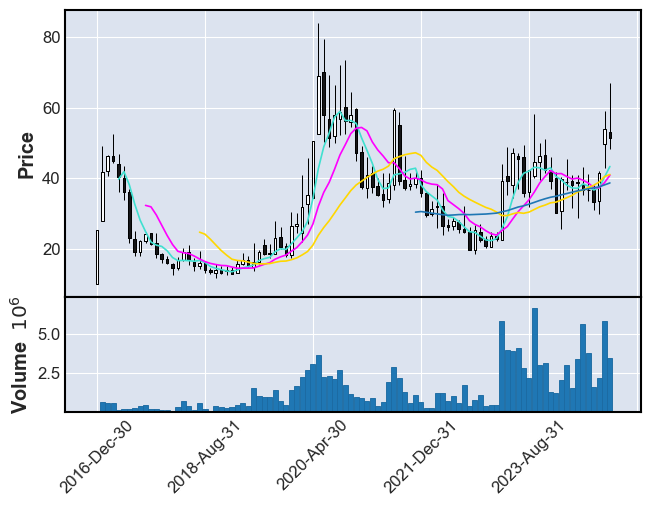

容大感光（300576）的市场深度：
市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


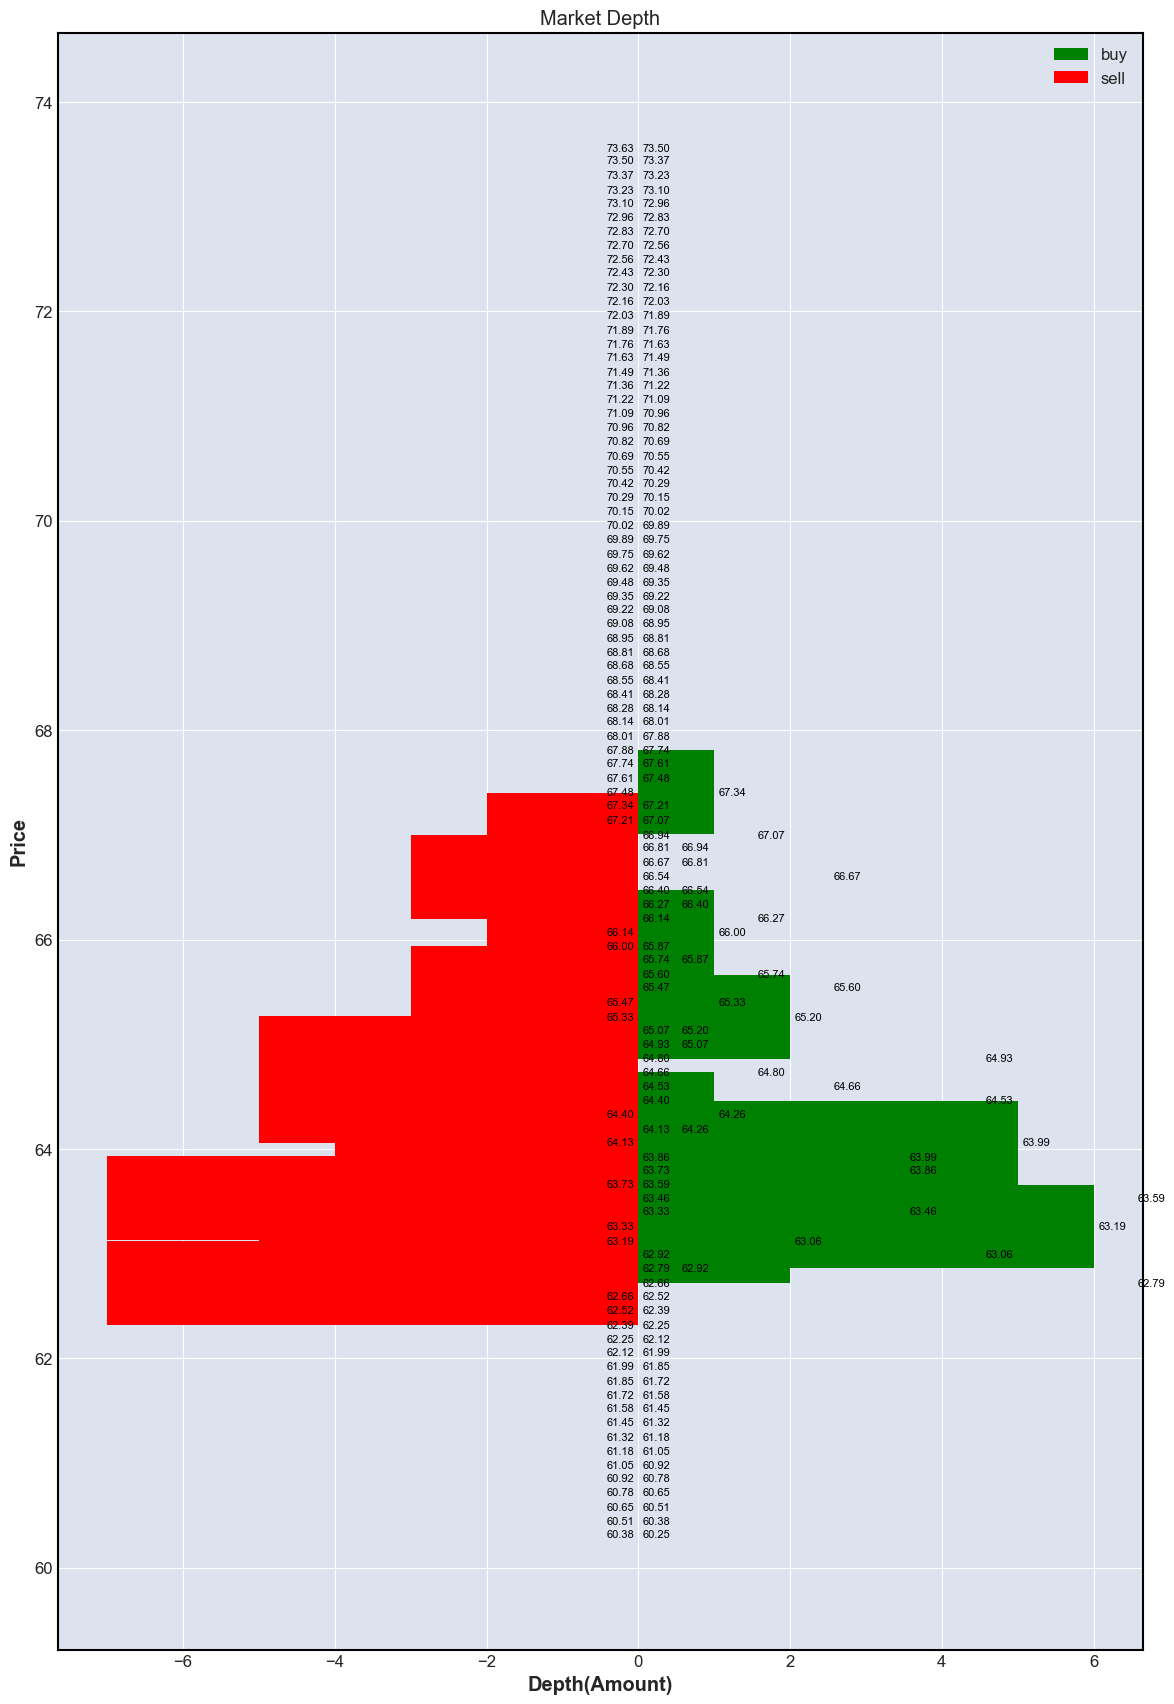

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [62.66, 62.79) │ 6163   │ -7   │ 62.72 │ 62.66    │ 62.79    │ 0        │ -7       │
│ [62.79, 62.92) │ 26860  │ -1   │ 62.86 │ 62.79    │ 62.92    │ 0        │ -1       │
│ [62.92, 63.06) │ 12265  │ -5   │ 62.99 │ 62.92    │ 63.06    │ 0        │ -5       │
│ [63.06, 63.19) │ 15683  │ 2    │ 63.12 │ 63.06    │ 63.19    │ 2        │ 0        │
│ [63.19, 63.33) │ 18156  │ 6    │ 63.26 │ 63.19    │ 63.33    │ 6        │ 0        │
│ [63.33, 63.46) │ 22684  │ -4   │ 63.4  │ 63.33    │ 63.46    │ 0        │ -4       │
│ [63.46, 63.59) │ 18113  │ -7   │ 63.53 │ 63.46    │ 63.59    │ 0        │ -7       │
│ [63.73, 63.86) │ 17297  │ -4   │ 63.8  │ 63.73    │ 63.86    │ 0        │ -4       │
│ [63.86, 63.99) │ 16349  │ -4   │ 63.92 │ 63.86    │ 63.99    │ 0        │ -4       │
│ [63.99, 64.13) │ 22369  │ 5    │ 64.06 │ 63.99    │ 64.13    │ 5        │ 0        │
│ [64.13, 64.26) │ 5782   │ -1   │ 64.19 │ 64.13    │ 64.26    │ 0        │ -1       │
│ [64.26, 64.4)  │ 1898   │ 1    │ 64.33 │ 64.26    │ 64.4     │ 1        │ 0        │
│ [64.4, 64.53)  │ 3723   │ -5   │ 64.46 │ 64.4     │ 64.53    │ 0        │ -5       │
│ [64.53, 64.66) │ 5291   │ -3   │ 64.6  │ 64.53    │ 64.66    │ 0        │ -3       │
│ [64.66, 64.8)  │ 5279   │ -2   │ 64.73 │ 64.66    │ 64.8     │ 0        │ -2       │
│ [64.8, 64.93)  │ 3071   │ -5   │ 64.87 │ 64.8     │ 64.93    │ 0        │ -5       │
│ [64.93, 65.07) │ 17103  │ -1   │ 65.0  │ 64.93    │ 65.07    │ 0        │ -1       │
│ [65.07, 65.2)  │ 12211  │ -1   │ 65.13 │ 65.07    │ 65.2     │ 0        │ -1       │
│ [65.2, 65.33)  │ 1877   │ 2    │ 65.26 │ 65.2     │ 65.33    │ 2        │ 0        │
│ [65.33, 65.47) │ 2153   │ 1    │ 65.4  │ 65.33    │ 65.47    │ 1        │ 0        │
│ [65.47, 65.6)  │ 1918   │ -3   │ 65.54 │ 65.47    │ 65.6     │ 0        │ -3       │
│ [65.6, 65.74)  │ 7960   │ -2   │ 65.67 │ 65.6     │ 65.74    │ 0        │ -2       │
│ [65.74, 65.87) │ 4280   │ -1   │ 65.81 │ 65.74    │ 65.87    │ 0        │ -1       │
│ [66.0, 66.14)  │ 9288   │ 1    │ 66.07 │ 66.0     │ 66.14    │ 1        │ 0        │
│ [66.14, 66.27) │ 2404   │ -2   │ 66.2  │ 66.14    │ 66.27    │ 0        │ -2       │
│ [66.27, 66.4)  │ 3212   │ -1   │ 66.34 │ 66.27    │ 66.4     │ 0        │ -1       │
│ [66.4, 66.54)  │ 928    │ -1   │ 66.47 │ 66.4     │ 66.54    │ 0        │ -1       │
│ [66.54, 66.67) │ 2217   │ -3   │ 66.6  │ 66.54    │ 66.67    │ 0        │ -3       │
│ [66.67, 66.81) │ 9247   │ -1   │ 66.74 │ 66.67    │ 66.81    │ 0        │ -1       │
│ [66.81, 66.94) │ 11786  │ -1   │ 66.88 │ 66.81    │ 66.94    │ 0        │ -1       │
│ [66.94, 67.07) │ 19510  │ -2   │ 67.0  │ 66.94    │ 67.07    │ 0        │ -2       │
│ [67.34, 67.48) │ 1830   │ 1    │ 67.41 │ 67.34    │ 67.48    │ 1        │ 0        │
└────────────────┴────────┴──────┴───────┴──────────┴──────────┴──────────┴──────────┘

四川长虹-周期：daily
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     1994-03-11  600839  16.80  19.69  20.50  16.60   261990  4.998470e+08   
1     1994-03-14  600839  21.00  19.80  21.50  19.40   107229  2.192590e+08   
2     1994-03-15  600839  19.80  19.25  20.48  19.12    37734  7.467700e+07   
3     1994-03-16  600839  19.20  19.28  20.02  19.10    24602  4.795900e+07   
4     1994-03-17  600839  19.55  18.60  19.59  18.02    16785  3.193100e+07   
...          ...     ...    ...    ...    ...    ...      ...           ...   
7286  2024-11-12  600839  12.86  13.31  13.43  12.77  5646096  7.473458e+09   
7287  2024-11-13  600839  13.33  13.17  13.68  12.89  4083006  5.378505e+09   
7288  2024-11-14  600839  13.01  13.80  14.20  12.80  7992659  1.083796e+10   
7289  2024-11-15  600839  13.96  13.23  14.36  12.85  7449855  1.029734e+10   
7290  2024-11-18  600839  12.89  12.12  12.89  11.91  2634679  3.208406e+09   

          振幅      涨跌幅    涨跌额    换手率  

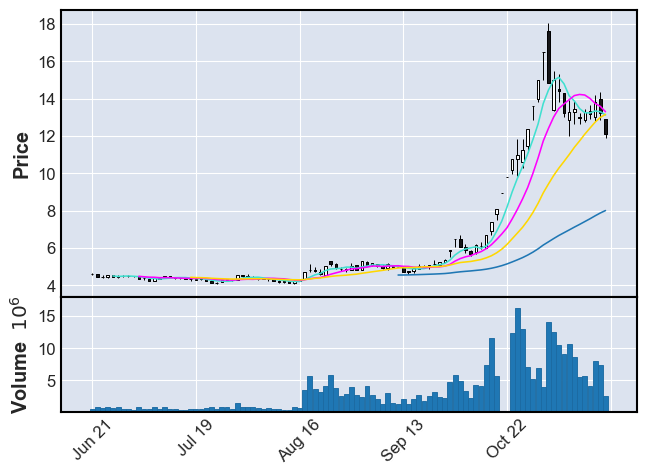

四川长虹-周期：weekly
              日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0     1994-03-11  600839  16.80  19.69  20.50  16.60    261990  4.998470e+08   
1     1994-03-18  600839  21.00  17.70  21.50  17.40    209638  4.154680e+08   
2     1994-03-25  600839  17.40  15.39  17.41  15.20     71628  1.181880e+08   
3     1994-04-01  600839  15.00  15.48  16.80  14.62    102736  1.609320e+08   
4     1994-04-08  600839  15.50  15.65  16.59  15.40     64293  1.025340e+08   
...          ...     ...    ...    ...    ...    ...       ...           ...   
1526  2024-10-25  600839   8.92  11.25  11.85   8.92  42141979  4.519061e+10   
1527  2024-11-01  600839  11.48  14.83  18.07  11.13  37351770  5.503133e+10   
1528  2024-11-08  600839  13.38  13.44  15.50  12.00  51422898  7.043653e+10   
1529  2024-11-15  600839  13.00  13.23  14.36  12.66  30747701  4.121999e+10   
1530  2024-11-18  600839  12.89  12.13  12.89  11.91   2635421  3.209305e+09   

          振幅      涨跌幅   

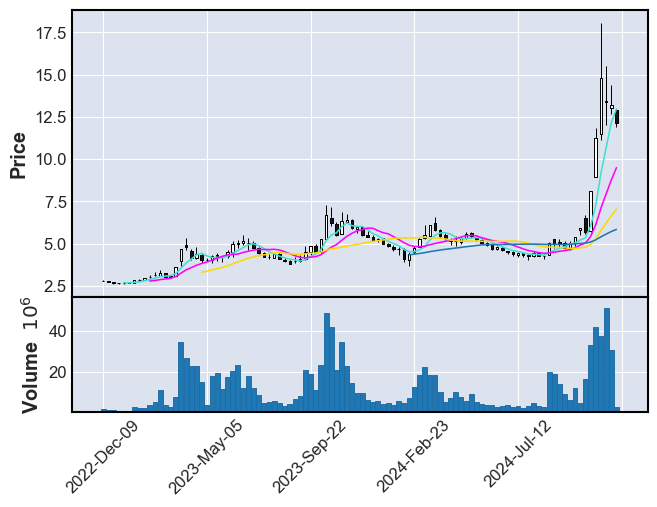

四川长虹-周期：monthly
             日期    股票代码     开盘     收盘     最高     最低        成交量           成交额  \
0    1994-03-31  600839  16.80  15.41  21.50  14.62     638439  1.182779e+09   
1    1994-04-29  600839  15.59  12.91  16.59  12.40     268187  3.796230e+08   
2    1994-05-31  600839  13.00  13.90  16.10  12.86     351145  5.016150e+08   
3    1994-06-30  600839  13.98   9.28  14.75   9.08     243446  2.901890e+08   
4    1994-07-29  600839   9.20   7.33   9.22   7.15     143116  1.147780e+08   
..          ...     ...    ...    ...    ...    ...        ...           ...   
361  2024-07-31  600839   4.51   4.52   4.54   4.06   15152279  6.591300e+09   
362  2024-08-30  600839   4.52   5.04   5.28   4.09   47096018  2.259755e+10   
363  2024-09-30  600839   5.07   5.91   5.91   4.60   46917533  2.402882e+10   
364  2024-10-31  600839   6.50  16.48  16.48   5.56  114808656  1.102268e+11   
365  2024-11-18  600839  17.62  12.13  18.07  11.91   98910342  1.377105e+11   

         振幅      涨跌幅   

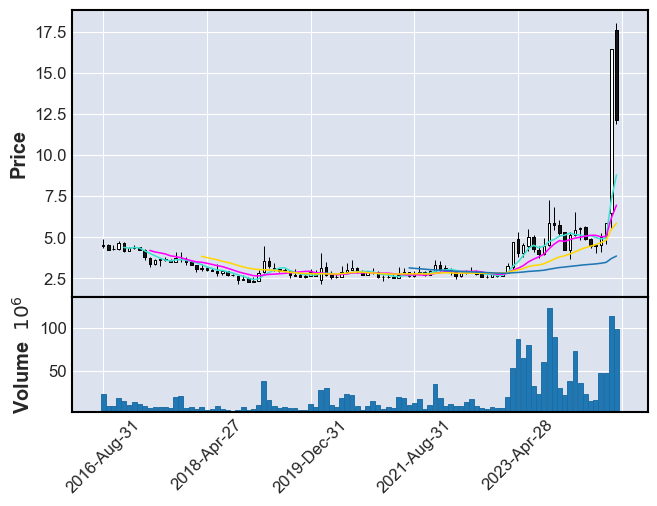

四川长虹（600839）的市场深度：
市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


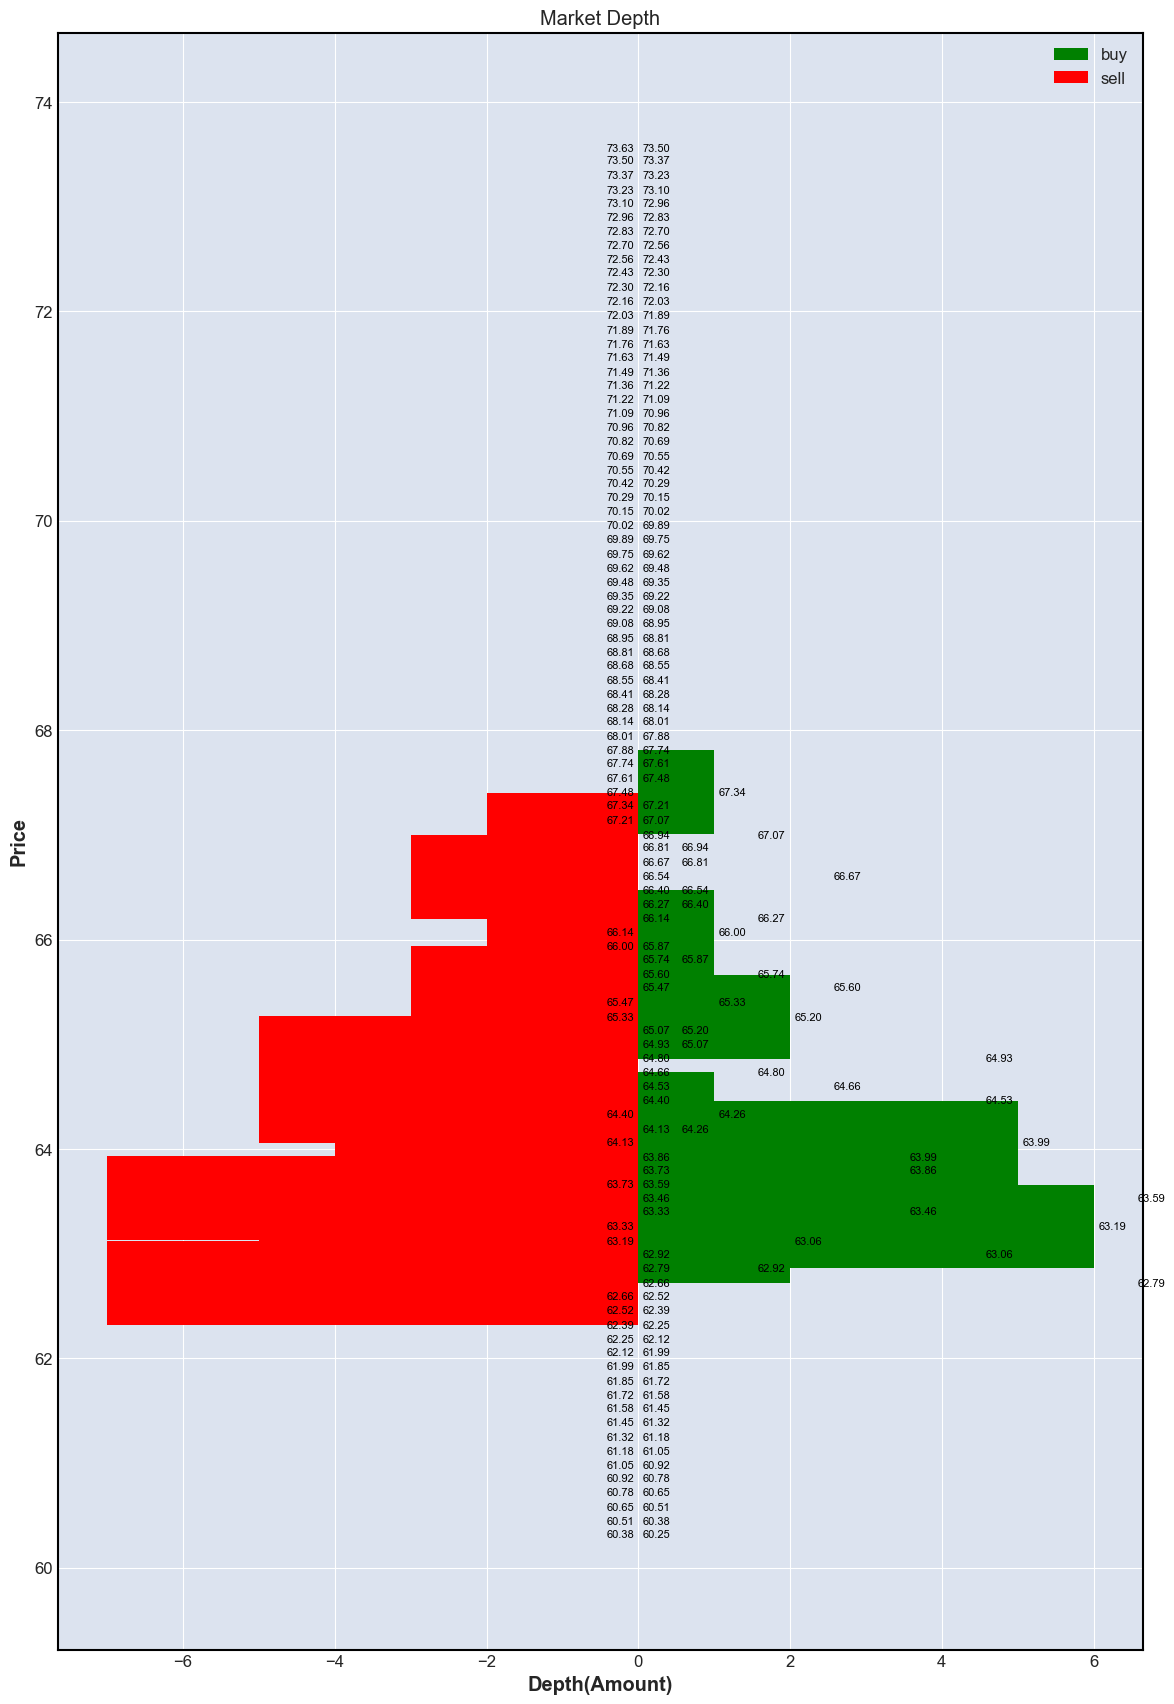

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [62.66, 62.79) │ 6163   │ -7   │ 62.72 │ 62.66    │ 62.79    │ 0        │ -7       │
│ [62.79, 62.92) │ 27384  │ -2   │ 62.86 │ 62.79    │ 62.92    │ 0        │ -2       │
│ [62.92, 63.06) │ 12265  │ -5   │ 62.99 │ 62.92    │ 63.06    │ 0        │ -5       │
│ [63.06, 63.19) │ 15683  │ 2    │ 63.12 │ 63.06    │ 63.19    │ 2        │ 0        │
│ [63.19, 63.33) │ 18156  │ 6    │ 63.26 │ 63.19    │ 63.33    │ 6        │ 0        │
│ [63.33, 63.46) │ 22684  │ -4   │ 63.4  │ 63.33    │ 63.46    │ 0        │ -4       │
│ [63.46, 63.59) │ 18113  │ -7   │ 63.53 │ 63.46    │ 63.59    │ 0        │ -7       │
│ [63.73, 63.86) │ 17297  │ -4   │ 63.8  │ 63.73    │ 63.86    │ 0        │ -4       │
│ [63.86, 63.99) │ 16349  │ -4   │ 63.92 │ 63.86    │ 63.99    │ 0        │ -4       │
│ [63.99, 64.13) │ 22369  │ 5    │ 64.06 │ 63.99    │ 64.13    │ 5        │ 0        │
│ [64.13, 64.26) │ 5782   │ -1   │ 64.19 │ 64.13    │ 64.26    │ 0        │ -1       │
│ [64.26, 64.4)  │ 1898   │ 1    │ 64.33 │ 64.26    │ 64.4     │ 1        │ 0        │
│ [64.4, 64.53)  │ 3723   │ -5   │ 64.46 │ 64.4     │ 64.53    │ 0        │ -5       │
│ [64.53, 64.66) │ 5291   │ -3   │ 64.6  │ 64.53    │ 64.66    │ 0        │ -3       │
│ [64.66, 64.8)  │ 5279   │ -2   │ 64.73 │ 64.66    │ 64.8     │ 0        │ -2       │
│ [64.8, 64.93)  │ 3071   │ -5   │ 64.87 │ 64.8     │ 64.93    │ 0        │ -5       │
│ [64.93, 65.07) │ 17103  │ -1   │ 65.0  │ 64.93    │ 65.07    │ 0        │ -1       │
│ [65.07, 65.2)  │ 12211  │ -1   │ 65.13 │ 65.07    │ 65.2     │ 0        │ -1       │
│ [65.2, 65.33)  │ 1877   │ 2    │ 65.26 │ 65.2     │ 65.33    │ 2        │ 0        │
│ [65.33, 65.47) │ 2153   │ 1    │ 65.4  │ 65.33    │ 65.47    │ 1        │ 0        │
│ [65.47, 65.6)  │ 1918   │ -3   │ 65.54 │ 65.47    │ 65.6     │ 0        │ -3       │
│ [65.6, 65.74)  │ 7960   │ -2   │ 65.67 │ 65.6     │ 65.74    │ 0        │ -2       │
│ [65.74, 65.87) │ 4280   │ -1   │ 65.81 │ 65.74    │ 65.87    │ 0        │ -1       │
│ [66.0, 66.14)  │ 9288   │ 1    │ 66.07 │ 66.0     │ 66.14    │ 1        │ 0        │
│ [66.14, 66.27) │ 2404   │ -2   │ 66.2  │ 66.14    │ 66.27    │ 0        │ -2       │
│ [66.27, 66.4)  │ 3212   │ -1   │ 66.34 │ 66.27    │ 66.4     │ 0        │ -1       │
│ [66.4, 66.54)  │ 928    │ -1   │ 66.47 │ 66.4     │ 66.54    │ 0        │ -1       │
│ [66.54, 66.67) │ 2217   │ -3   │ 66.6  │ 66.54    │ 66.67    │ 0        │ -3       │
│ [66.67, 66.81) │ 9247   │ -1   │ 66.74 │ 66.67    │ 66.81    │ 0        │ -1       │
│ [66.81, 66.94) │ 11786  │ -1   │ 66.88 │ 66.81    │ 66.94    │ 0        │ -1       │
│ [66.94, 67.07) │ 19510  │ -2   │ 67.0  │ 66.94    │ 67.07    │ 0        │ -2       │
│ [67.34, 67.48) │ 1830   │ 1    │ 67.41 │ 67.34    │ 67.48    │ 1        │ 0        │
└────────────────┴────────┴──────┴───────┴──────────┴──────────┴──────────┴──────────┘

永泰能源-周期：daily
              日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0     1998-05-13  600157  26.00  27.75  29.48  26.00     50950  1.408840e+08   
1     1998-05-14  600157  27.78  25.45  28.10  25.30     20929  5.531800e+07   
2     1998-05-15  600157  25.02  24.60  25.58  24.31     15781  3.924200e+07   
3     1998-05-18  600157  24.50  23.81  24.50  23.76     11755  2.827300e+07   
4     1998-05-19  600157  23.80  23.50  23.80  22.08     16182  3.712100e+07   
...          ...     ...    ...    ...    ...    ...       ...           ...   
5863  2024-11-12  600157   1.75   1.67   1.75   1.65  19480412  3.282120e+09   
5864  2024-11-13  600157   1.64   1.66   1.67   1.61  11499652  1.886184e+09   
5865  2024-11-14  600157   1.65   1.58   1.68   1.58  11782341  1.907666e+09   
5866  2024-11-15  600157   1.57   1.55   1.60   1.54   9124769  1.434167e+09   
5867  2024-11-18  600157   1.59   1.70   1.71   1.58  12027996  2.005533e+09   

          振幅      涨跌幅    

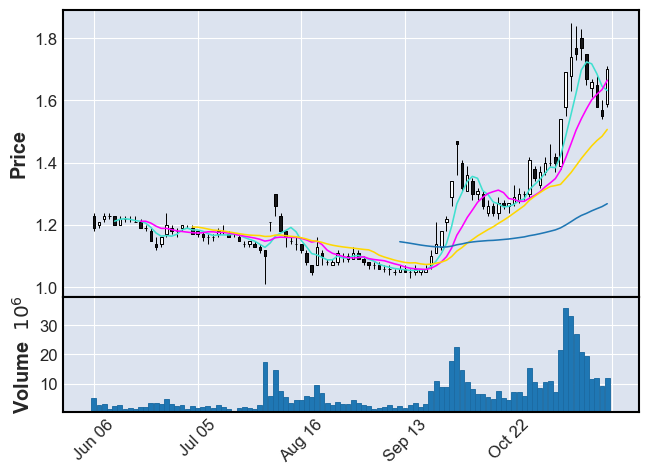

永泰能源-周期：weekly
              日期    股票代码     开盘     收盘     最高     最低        成交量           成交额  \
0     1998-05-15  600157  26.00  24.60  29.48  24.31      87660  2.354440e+08   
1     1998-05-22  600157  24.50  24.95  25.18  22.08      51987  1.233330e+08   
2     1998-05-29  600157  25.48  23.75  27.28  23.20      26008  6.372000e+07   
3     1998-06-05  600157  24.20  24.75  25.17  23.36      13361  3.240100e+07   
4     1998-06-12  600157  24.90  25.89  25.98  24.05      26943  6.759000e+07   
...          ...     ...    ...    ...    ...    ...        ...           ...   
1245  2024-10-25  600157   1.27   1.30   1.33   1.24   29238345  3.753785e+09   
1246  2024-11-01  600157   1.30   1.40   1.46   1.29   55628910  7.675794e+09   
1247  2024-11-08  600157   1.42   1.75   1.85   1.37  125260905  2.073517e+10   
1248  2024-11-15  600157   1.80   1.55   1.83   1.54   72823338  1.221293e+10   
1249  2024-11-18  600157   1.59   1.69   1.71   1.58   12033273  2.006429e+09   

          振幅

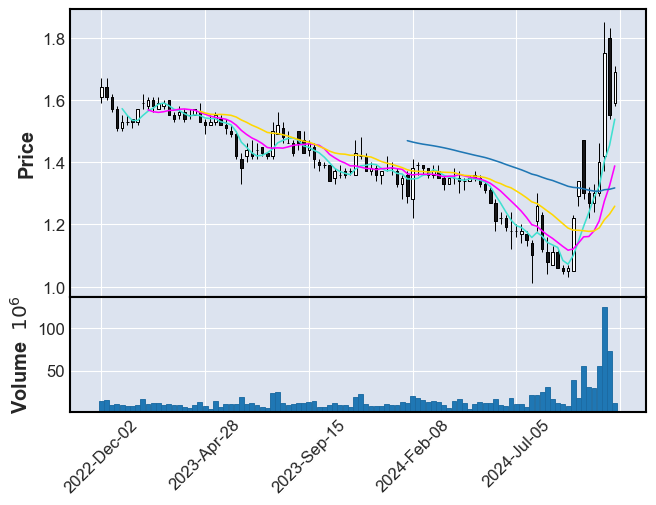

永泰能源-周期：monthly
             日期    股票代码     开盘     收盘     最高     最低        成交量           成交额  \
0    1998-05-29  600157  26.00  23.75  29.48  22.08     165655  4.224970e+08   
1    1998-06-30  600157  24.20  27.03  27.55  23.36     108225  2.785490e+08   
2    1998-07-31  600157  27.10  14.80  28.00  14.60     103495  2.595380e+08   
3    1998-08-31  600157  14.75  17.39  17.48  13.00     313861  5.006800e+08   
4    1998-09-30  600157  17.38  22.09  22.23  16.90     581358  1.173200e+09   
..          ...     ...    ...    ...    ...    ...        ...           ...   
298  2024-07-24  600157   1.18   1.10   1.20   1.01   48819005  5.461865e+09   
299  2024-08-30  600157   1.21   1.11   1.30   1.04   92433026  1.058989e+10   
300  2024-09-30  600157   1.11   1.34   1.34   1.03   85680836  9.881254e+09   
301  2024-10-31  600157   1.47   1.40   1.47   1.22  160019432  2.145430e+10   
302  2024-11-18  600157   1.40   1.69   1.85   1.37  221100256  3.651337e+10   

         振幅      涨跌幅   

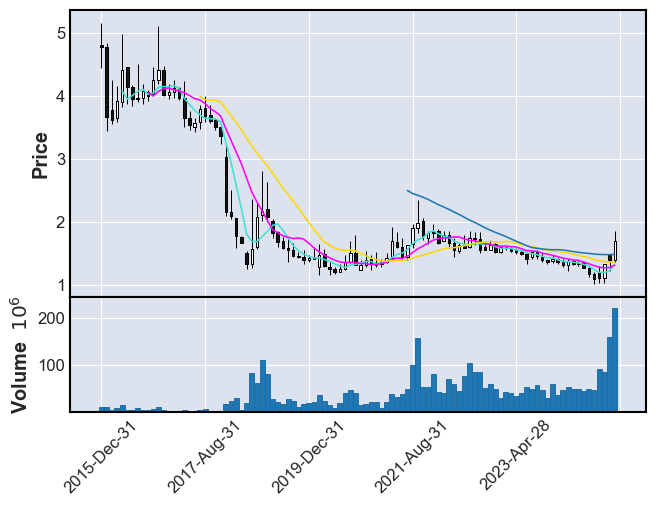

永泰能源（600157）的市场深度：
市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


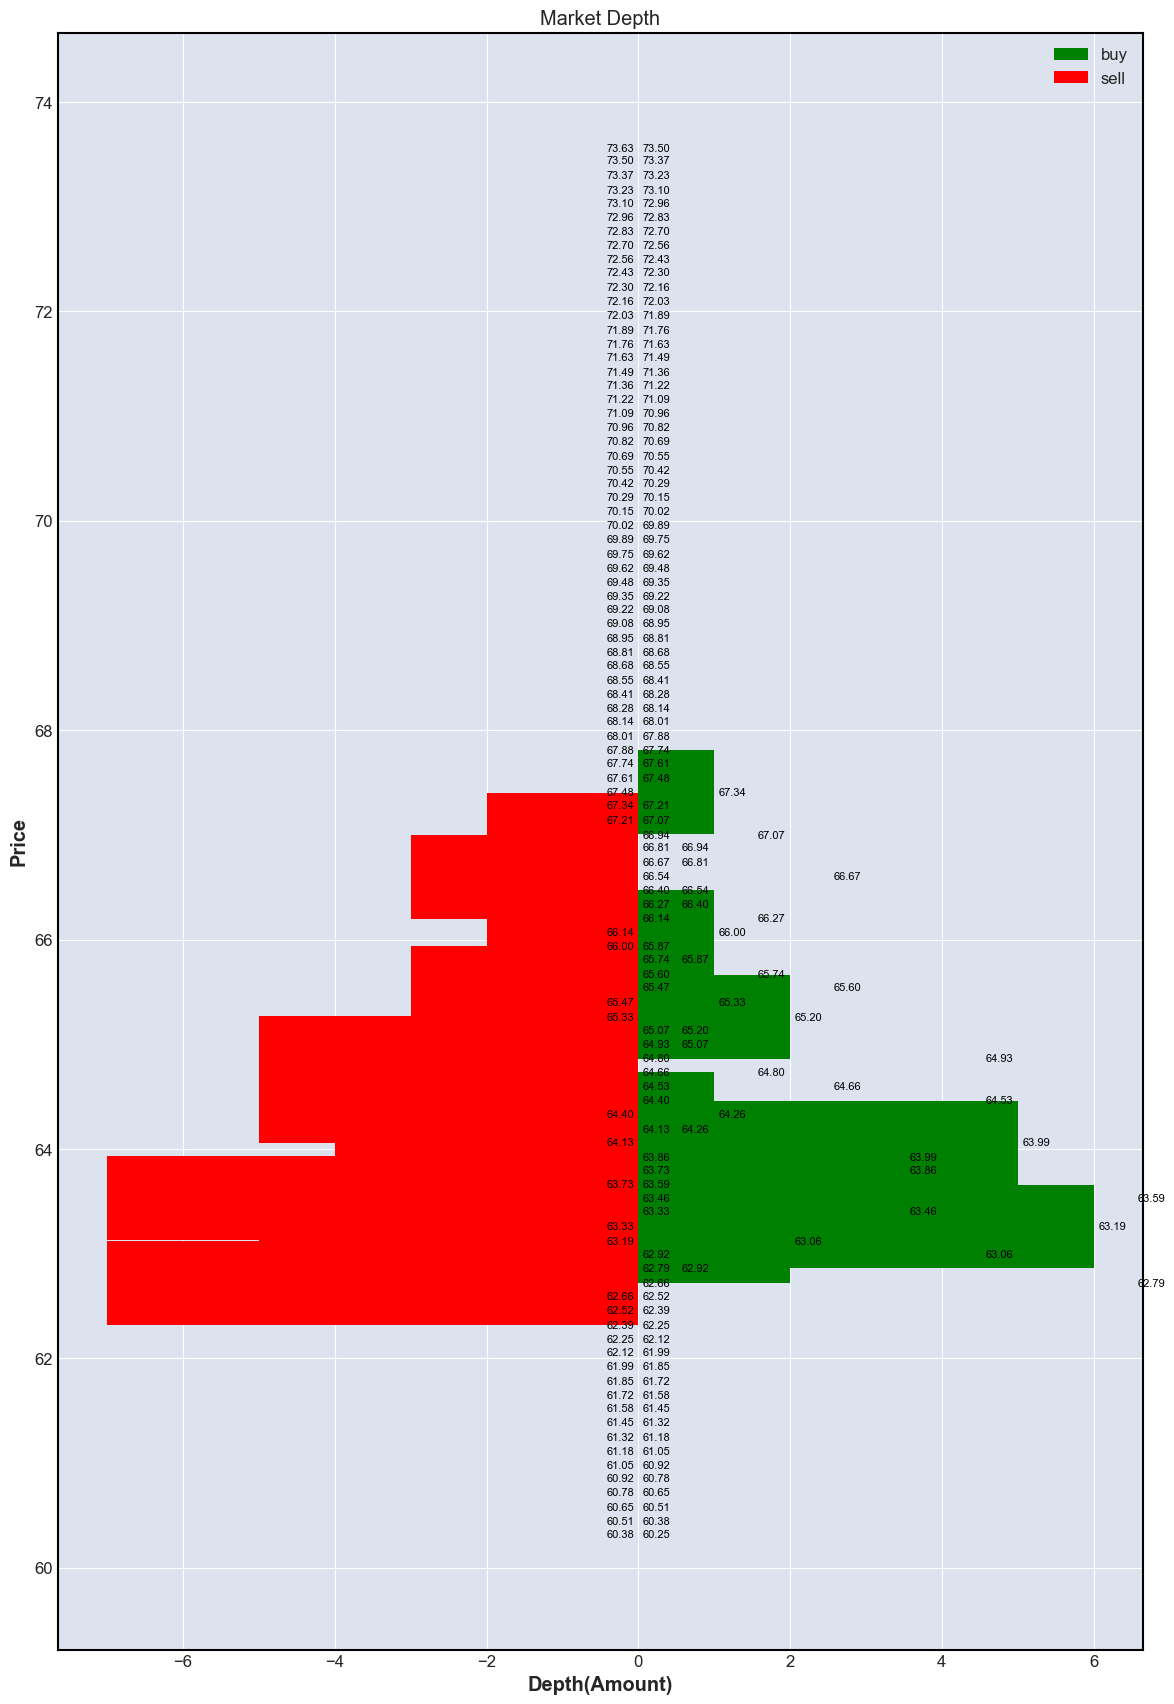

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [62.66, 62.79) │ 6163   │ -7   │ 62.72 │ 62.66    │ 62.79    │ 0        │ -7       │
│ [62.79, 62.92) │ 27517  │ -1   │ 62.86 │ 62.79    │ 62.92    │ 0        │ -1       │
│ [62.92, 63.06) │ 12986  │ -5   │ 62.99 │ 62.92    │ 63.06    │ 0        │ -5       │
│ [63.06, 63.19) │ 15683  │ 2    │ 63.12 │ 63.06    │ 63.19    │ 2        │ 0        │
│ [63.19, 63.33) │ 18156  │ 6    │ 63.26 │ 63.19    │ 63.33    │ 6        │ 0        │
│ [63.33, 63.46) │ 22684  │ -4   │ 63.4  │ 63.33    │ 63.46    │ 0        │ -4       │
│ [63.46, 63.59) │ 18113  │ -7   │ 63.53 │ 63.46    │ 63.59    │ 0        │ -7       │
│ [63.73, 63.86) │ 17297  │ -4   │ 63.8  │ 63.73    │ 63.86    │ 0        │ -4       │
│ [63.86, 63.99) │ 16349  │ -4   │ 63.92 │ 63.86    │ 63.99    │ 0        │ -4       │
│ [63.99, 64.13) │ 22369  │ 5    │ 64.06 │ 63.99    │ 64.13    │ 5        │ 0        │
│ [64.13, 64.26) │ 5782   │ -1   │ 64.19 │ 64.13    │ 64.26    │ 0        │ -1       │
│ [64.26, 64.4)  │ 1898   │ 1    │ 64.33 │ 64.26    │ 64.4     │ 1        │ 0        │
│ [64.4, 64.53)  │ 3723   │ -5   │ 64.46 │ 64.4     │ 64.53    │ 0        │ -5       │
│ [64.53, 64.66) │ 5291   │ -3   │ 64.6  │ 64.53    │ 64.66    │ 0        │ -3       │
│ [64.66, 64.8)  │ 5279   │ -2   │ 64.73 │ 64.66    │ 64.8     │ 0        │ -2       │
│ [64.8, 64.93)  │ 3071   │ -5   │ 64.87 │ 64.8     │ 64.93    │ 0        │ -5       │
│ [64.93, 65.07) │ 17103  │ -1   │ 65.0  │ 64.93    │ 65.07    │ 0        │ -1       │
│ [65.07, 65.2)  │ 12211  │ -1   │ 65.13 │ 65.07    │ 65.2     │ 0        │ -1       │
│ [65.2, 65.33)  │ 1877   │ 2    │ 65.26 │ 65.2     │ 65.33    │ 2        │ 0        │
│ [65.33, 65.47) │ 2153   │ 1    │ 65.4  │ 65.33    │ 65.47    │ 1        │ 0        │
│ [65.47, 65.6)  │ 1918   │ -3   │ 65.54 │ 65.47    │ 65.6     │ 0        │ -3       │
│ [65.6, 65.74)  │ 7960   │ -2   │ 65.67 │ 65.6     │ 65.74    │ 0        │ -2       │
│ [65.74, 65.87) │ 4280   │ -1   │ 65.81 │ 65.74    │ 65.87    │ 0        │ -1       │
│ [66.0, 66.14)  │ 9288   │ 1    │ 66.07 │ 66.0     │ 66.14    │ 1        │ 0        │
│ [66.14, 66.27) │ 2404   │ -2   │ 66.2  │ 66.14    │ 66.27    │ 0        │ -2       │
│ [66.27, 66.4)  │ 3212   │ -1   │ 66.34 │ 66.27    │ 66.4     │ 0        │ -1       │
│ [66.4, 66.54)  │ 928    │ -1   │ 66.47 │ 66.4     │ 66.54    │ 0        │ -1       │
│ [66.54, 66.67) │ 2217   │ -3   │ 66.6  │ 66.54    │ 66.67    │ 0        │ -3       │
│ [66.67, 66.81) │ 9247   │ -1   │ 66.74 │ 66.67    │ 66.81    │ 0        │ -1       │
│ [66.81, 66.94) │ 11786  │ -1   │ 66.88 │ 66.81    │ 66.94    │ 0        │ -1       │
│ [66.94, 67.07) │ 19510  │ -2   │ 67.0  │ 66.94    │ 67.07    │ 0        │ -2       │
│ [67.34, 67.48) │ 1830   │ 1    │ 67.41 │ 67.34    │ 67.48    │ 1        │ 0        │
└────────────────┴────────┴──────┴───────┴──────────┴──────────┴──────────┴──────────┘

中南股份-周期：daily
              日期    股票代码     开盘     收盘     最高     最低     成交量           成交额  \
0     1997-05-08  000717  15.00  15.08  16.50  14.88  404038  6.229113e+08   
1     1997-05-09  000717  15.20  15.31  15.59  14.65  101964  1.543605e+08   
2     1997-05-12  000717  15.50  16.16  16.48  15.35  114675  1.825065e+08   
3     1997-05-13  000717  16.00  15.33  16.10  15.00   55829  8.628832e+07   
4     1997-05-14  000717  15.20  14.92  15.70  14.70   45290  6.859488e+07   
...          ...     ...    ...    ...    ...    ...     ...           ...   
6506  2024-11-12  000717   3.05   2.94   3.06   2.91  745025  2.213104e+08   
6507  2024-11-13  000717   2.91   2.90   2.97   2.85  601713  1.743742e+08   
6508  2024-11-14  000717   2.90   2.76   2.90   2.75  568879  1.599196e+08   
6509  2024-11-15  000717   2.74   2.66   2.78   2.65  469623  1.279104e+08   
6510  2024-11-18  000717   2.83   2.93   2.93   2.78  437748  1.271141e+08   

         振幅    涨跌幅   涨跌额    换手率  
0     20.88  94

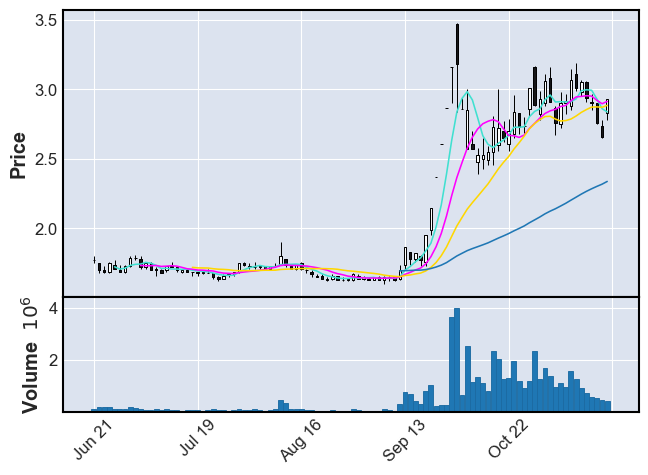

中南股份-周期：weekly
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     1997-05-09  000717  15.00  15.31  16.50  14.65   506002  7.772718e+08   
1     1997-05-16  000717  15.50  13.65  16.48  13.64   276068  4.250346e+08   
2     1997-05-23  000717  13.75  11.93  14.25  11.23    91812  1.190401e+08   
3     1997-05-30  000717  12.00  12.33  12.58  11.11    77878  9.439885e+07   
4     1997-06-06  000717  12.60  11.70  13.78  11.48   108740  1.383512e+08   
...          ...     ...    ...    ...    ...    ...      ...           ...   
1366  2024-10-25  000717   2.70   2.74   2.96   2.56  6728348  1.840610e+09   
1367  2024-11-01  000717   2.86   2.91   3.17   2.78  7901891  2.364993e+09   
1368  2024-11-08  000717   2.87   3.01   3.19   2.67  5945500  1.745462e+09   
1369  2024-11-15  000717   2.98   2.66   3.07   2.65  3320904  9.637028e+08   
1370  2024-11-18  000717   2.83   2.93   2.93   2.78   437748  1.271141e+08   

         振幅    涨跌幅   涨跌额    换手率  
0 

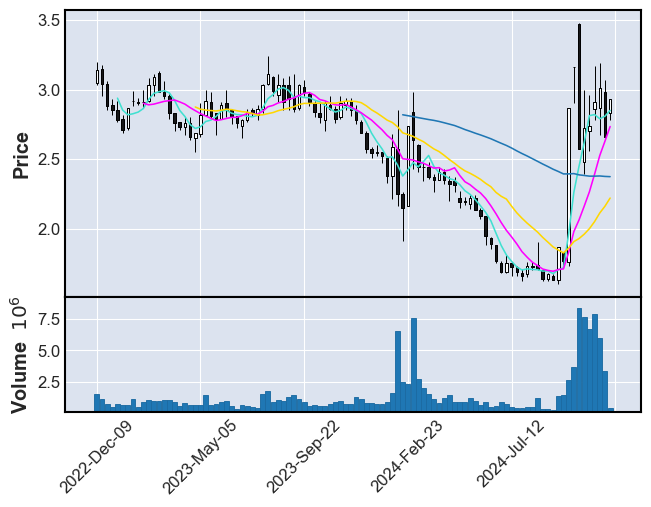

中南股份-周期：monthly
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    1997-05-30  000717  15.00  12.33  16.50  11.11    951760  1.415745e+09   
1    1997-06-27  000717  12.60  11.03  13.78  10.00    284715  3.376285e+08   
2    1997-07-31  000717  11.08  11.36  12.30   8.50    324634  3.536508e+08   
3    1997-08-29  000717  11.42  13.24  13.45  10.70    448211  5.556319e+08   
4    1997-09-30  000717  13.24  10.60  13.80  10.01    224776  2.796126e+08   
..          ...     ...    ...    ...    ...    ...       ...           ...   
322  2024-07-31  000717   1.69   1.75   1.81   1.62   2367821  4.057305e+08   
323  2024-08-30  000717   1.75   1.67   1.90   1.62   2600085  4.487682e+08   
324  2024-09-30  000717   1.66   3.16   3.16   1.60   9486634  2.279026e+09   
325  2024-10-31  000717   3.47   3.06   3.48   2.39  29285152  8.299233e+09   
326  2024-11-18  000717   3.08   2.93   3.19   2.65  11093634  3.255398e+09   

        振幅    涨跌幅   涨跌额     换手率  
0

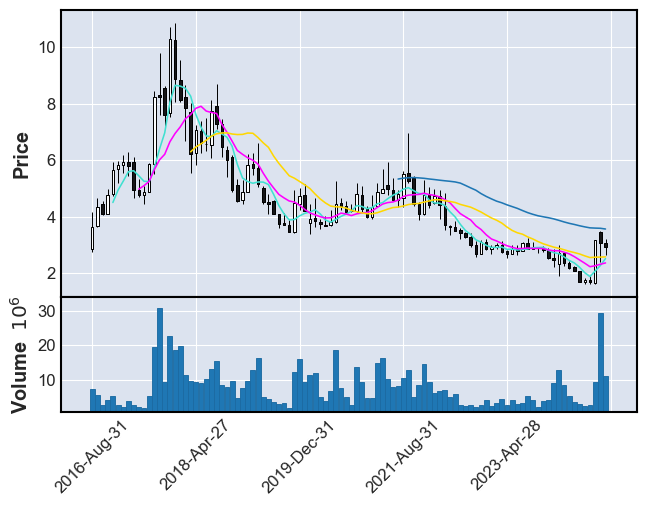

中南股份（000717）的市场深度：
市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


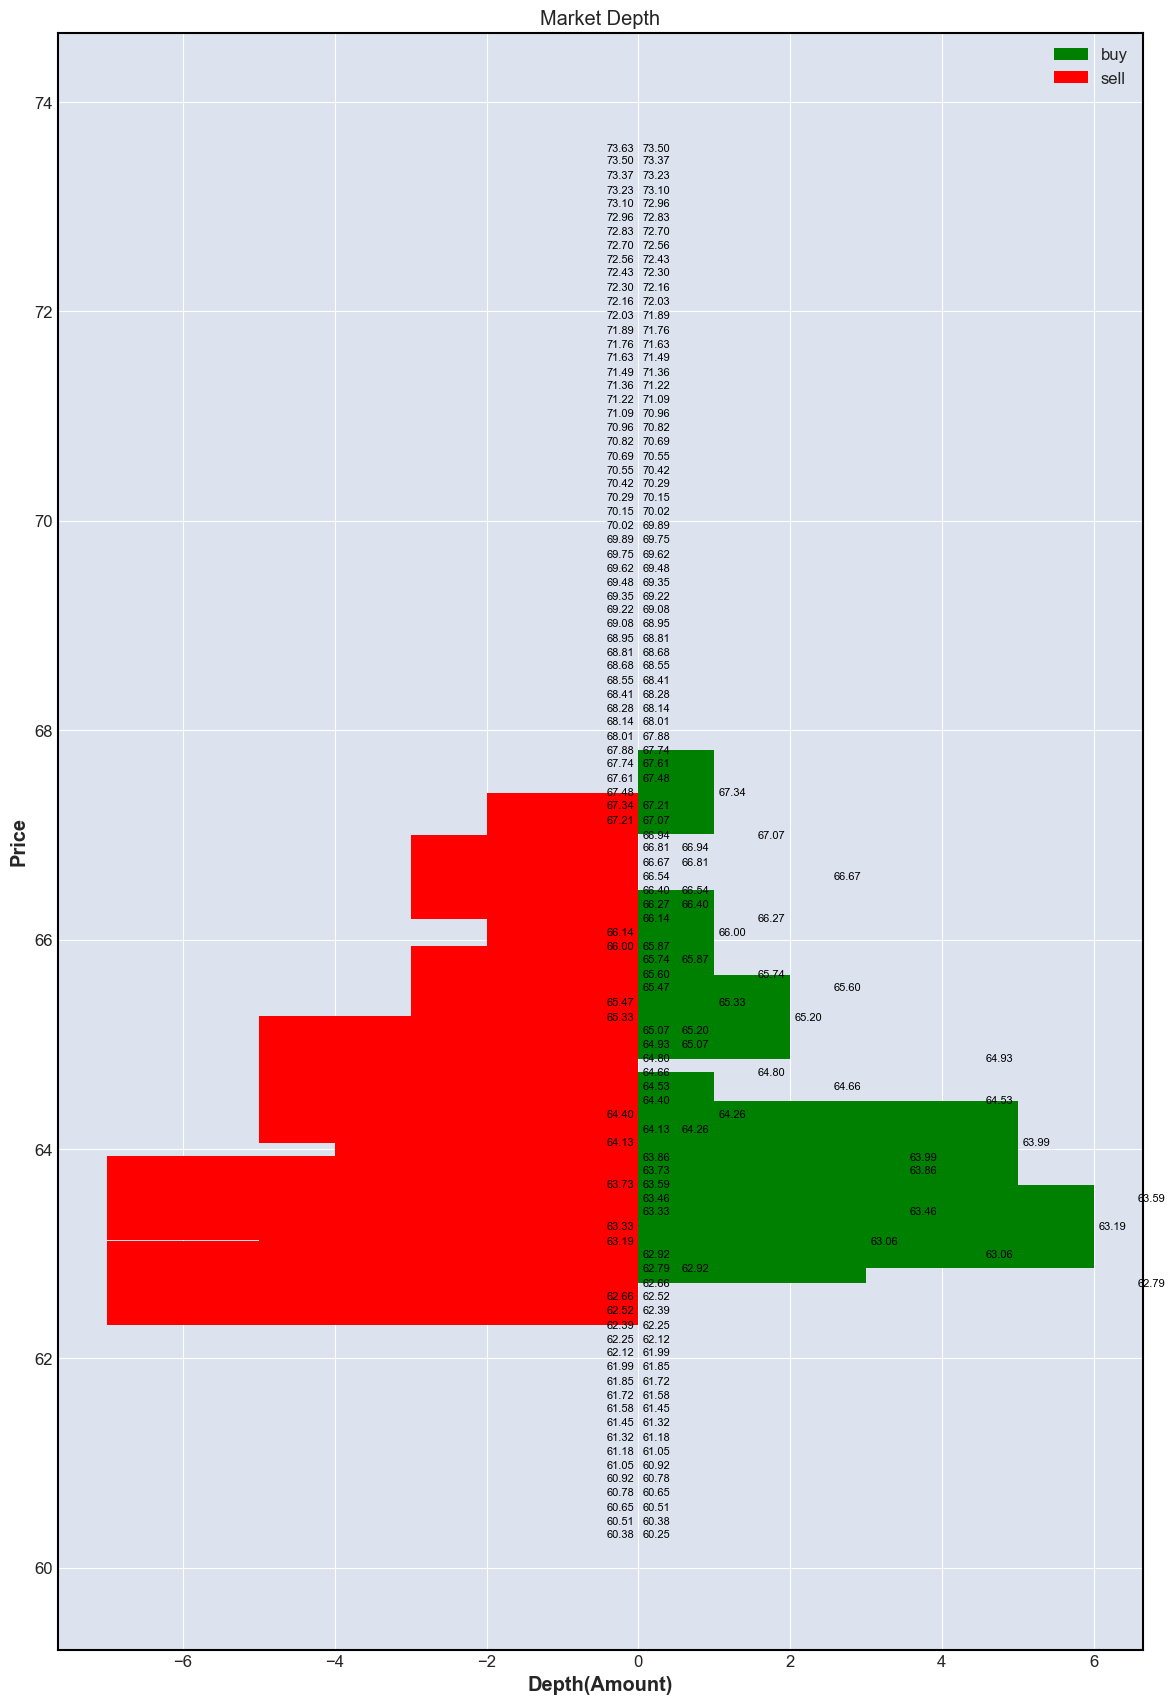

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [62.66, 62.79) │ 6163   │ -7   │ 62.72 │ 62.66    │ 62.79    │ 0        │ -7       │
│ [62.79, 62.92) │ 27517  │ -1   │ 62.86 │ 62.79    │ 62.92    │ 0        │ -1       │
│ [62.92, 63.06) │ 12986  │ -5   │ 62.99 │ 62.92    │ 63.06    │ 0        │ -5       │
│ [63.06, 63.19) │ 15753  │ 3    │ 63.12 │ 63.06    │ 63.19    │ 3        │ 0        │
│ [63.19, 63.33) │ 18156  │ 6    │ 63.26 │ 63.19    │ 63.33    │ 6        │ 0        │
│ [63.33, 63.46) │ 22684  │ -4   │ 63.4  │ 63.33    │ 63.46    │ 0        │ -4       │
│ [63.46, 63.59) │ 18113  │ -7   │ 63.53 │ 63.46    │ 63.59    │ 0        │ -7       │
│ [63.73, 63.86) │ 17297  │ -4   │ 63.8  │ 63.73    │ 63.86    │ 0        │ -4       │
│ [63.86, 63.99) │ 16349  │ -4   │ 63.92 │ 63.86    │ 63.99    │ 0        │ -4       │
│ [63.99, 64.13) │ 22369  │ 5    │ 64.06 │ 63.99    │ 64.13    │ 5        │ 0        │
│ [64.13, 64.26) │ 5782   │ -1   │ 64.19 │ 64.13    │ 64.26    │ 0        │ -1       │
│ [64.26, 64.4)  │ 1898   │ 1    │ 64.33 │ 64.26    │ 64.4     │ 1        │ 0        │
│ [64.4, 64.53)  │ 3723   │ -5   │ 64.46 │ 64.4     │ 64.53    │ 0        │ -5       │
│ [64.53, 64.66) │ 5291   │ -3   │ 64.6  │ 64.53    │ 64.66    │ 0        │ -3       │
│ [64.66, 64.8)  │ 5279   │ -2   │ 64.73 │ 64.66    │ 64.8     │ 0        │ -2       │
│ [64.8, 64.93)  │ 3071   │ -5   │ 64.87 │ 64.8     │ 64.93    │ 0        │ -5       │
│ [64.93, 65.07) │ 17103  │ -1   │ 65.0  │ 64.93    │ 65.07    │ 0        │ -1       │
│ [65.07, 65.2)  │ 12211  │ -1   │ 65.13 │ 65.07    │ 65.2     │ 0        │ -1       │
│ [65.2, 65.33)  │ 1877   │ 2    │ 65.26 │ 65.2     │ 65.33    │ 2        │ 0        │
│ [65.33, 65.47) │ 2153   │ 1    │ 65.4  │ 65.33    │ 65.47    │ 1        │ 0        │
│ [65.47, 65.6)  │ 1918   │ -3   │ 65.54 │ 65.47    │ 65.6     │ 0        │ -3       │
│ [65.6, 65.74)  │ 7960   │ -2   │ 65.67 │ 65.6     │ 65.74    │ 0        │ -2       │
│ [65.74, 65.87) │ 4280   │ -1   │ 65.81 │ 65.74    │ 65.87    │ 0        │ -1       │
│ [66.0, 66.14)  │ 9288   │ 1    │ 66.07 │ 66.0     │ 66.14    │ 1        │ 0        │
│ [66.14, 66.27) │ 2404   │ -2   │ 66.2  │ 66.14    │ 66.27    │ 0        │ -2       │
│ [66.27, 66.4)  │ 3212   │ -1   │ 66.34 │ 66.27    │ 66.4     │ 0        │ -1       │
│ [66.4, 66.54)  │ 928    │ -1   │ 66.47 │ 66.4     │ 66.54    │ 0        │ -1       │
│ [66.54, 66.67) │ 2217   │ -3   │ 66.6  │ 66.54    │ 66.67    │ 0        │ -3       │
│ [66.67, 66.81) │ 9247   │ -1   │ 66.74 │ 66.67    │ 66.81    │ 0        │ -1       │
│ [66.81, 66.94) │ 11786  │ -1   │ 66.88 │ 66.81    │ 66.94    │ 0        │ -1       │
│ [66.94, 67.07) │ 19510  │ -2   │ 67.0  │ 66.94    │ 67.07    │ 0        │ -2       │
│ [67.34, 67.48) │ 1830   │ 1    │ 67.41 │ 67.34    │ 67.48    │ 1        │ 0        │
└────────────────┴────────┴──────┴───────┴──────────┴──────────┴──────────┴──────────┘

中公教育-周期：daily
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     2011-08-10  002607  30.00  32.18  33.86  29.52   161271  4.966592e+08   
1     2011-08-11  002607  31.19  32.80  33.60  30.50   116301  3.724757e+08   
2     2011-08-12  002607  32.14  31.51  32.55  31.31    73108  2.335276e+08   
3     2011-08-15  002607  31.80  31.79  32.80  31.21    55643  1.782103e+08   
4     2011-08-16  002607  32.38  33.42  34.14  32.31    79851  2.668497e+08   
...          ...     ...    ...    ...    ...    ...      ...           ...   
3042  2024-11-12  002607   3.67   3.62   3.88   3.56  7057502  2.612307e+09   
3043  2024-11-13  002607   3.55   3.56   3.65   3.45  4420667  1.567636e+09   
3044  2024-11-14  002607   3.54   3.47   3.66   3.46  4031146  1.428897e+09   
3045  2024-11-15  002607   3.43   3.49   3.63   3.42  4891704  1.727554e+09   
3046  2024-11-18  002607   3.47   3.26   3.49   3.14  2817790  9.265051e+08   

         振幅    涨跌幅   涨跌额    换手率  
0  

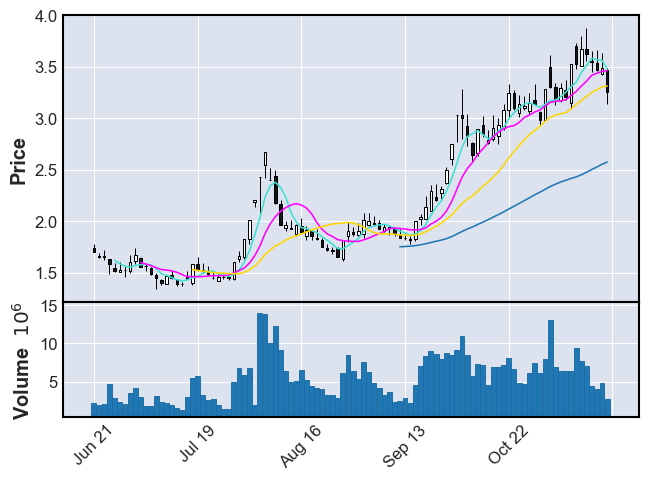

中公教育-周期：weekly
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    2011-08-12  002607  30.00  31.51  33.86  29.52    350680  1.102663e+09   
1    2011-08-19  002607  31.80  32.25  34.79  31.21    279449  9.294257e+08   
2    2011-08-26  002607  32.04  34.12  34.90  31.51    198923  6.616502e+08   
3    2011-09-02  002607  34.55  31.11  35.49  30.63    131499  4.339269e+08   
4    2011-09-09  002607  30.61  31.32  32.86  29.70     92435  2.897783e+08   
..          ...     ...    ...    ...    ...    ...       ...           ...   
640  2024-10-25  002607   2.91   3.12   3.33   2.89  31684081  9.916860e+09   
641  2024-11-01  002607   3.07   3.30   3.61   2.93  40812401  1.323441e+10   
642  2024-11-08  002607   3.30   3.53   3.73   3.09  35575374  1.189691e+10   
643  2024-11-15  002607   3.51   3.49   3.88   3.42  28121920  1.017785e+10   
644  2024-11-18  002607   3.47   3.26   3.49   3.14   2817790  9.265051e+08   

        振幅    涨跌幅   涨跌额     换手率  
0 

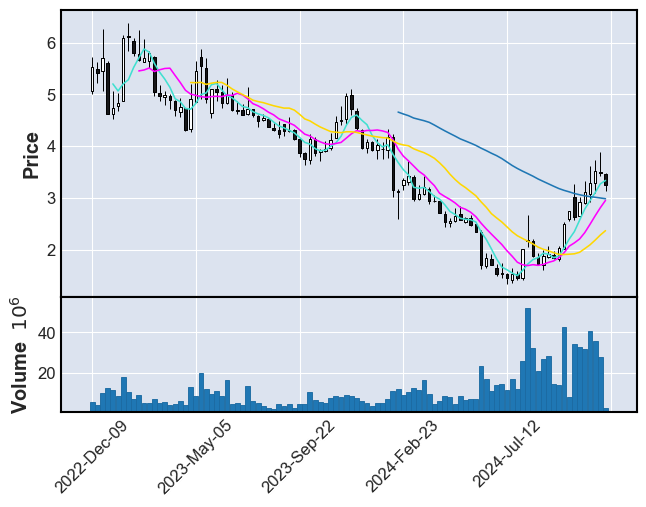

中公教育-周期：monthly
             日期    股票代码     开盘     收盘     最高     最低        成交量           成交额  \
0    2011-08-31  002607  30.00  32.00  35.49  29.52     924449  3.014597e+09   
1    2011-09-30  002607  32.11  29.70  32.86  28.12     234018  7.179579e+08   
2    2011-10-31  002607  30.20  32.08  32.60  28.72     117804  3.644960e+08   
3    2011-11-30  002607  31.84  30.37  34.99  30.00     106545  3.529074e+08   
4    2011-12-30  002607  30.95  28.30  31.42  26.50      51120  1.486839e+08   
..          ...     ...    ...    ...    ...    ...        ...           ...   
150  2024-07-31  002607   1.53   1.66   1.74   1.34   69006333  1.054550e+10   
151  2024-08-30  002607   1.65   1.88   2.67   1.61  145149352  3.006628e+10   
152  2024-09-30  002607   1.87   2.75   2.75   1.78  108019708  2.306162e+10   
153  2024-10-31  002607   3.03   3.28   3.33   2.58  126845266  3.821038e+10   
154  2024-11-18  002607   3.50   3.25   3.88   3.09   79513922  2.751400e+10   

        振幅    涨跌幅   涨跌额

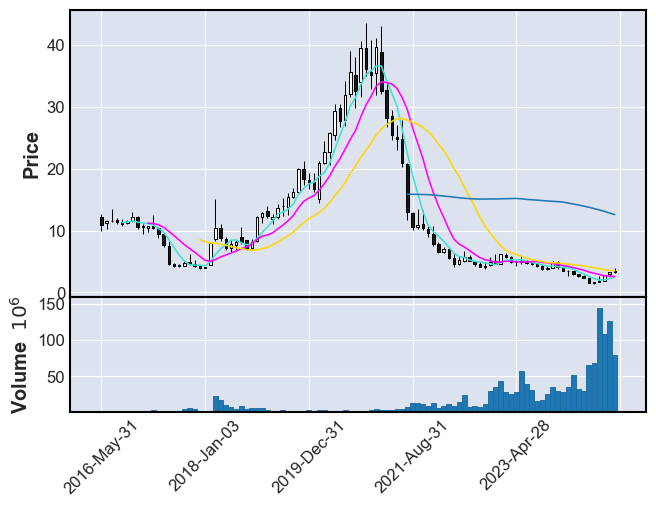

中公教育（002607）的市场深度：
市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


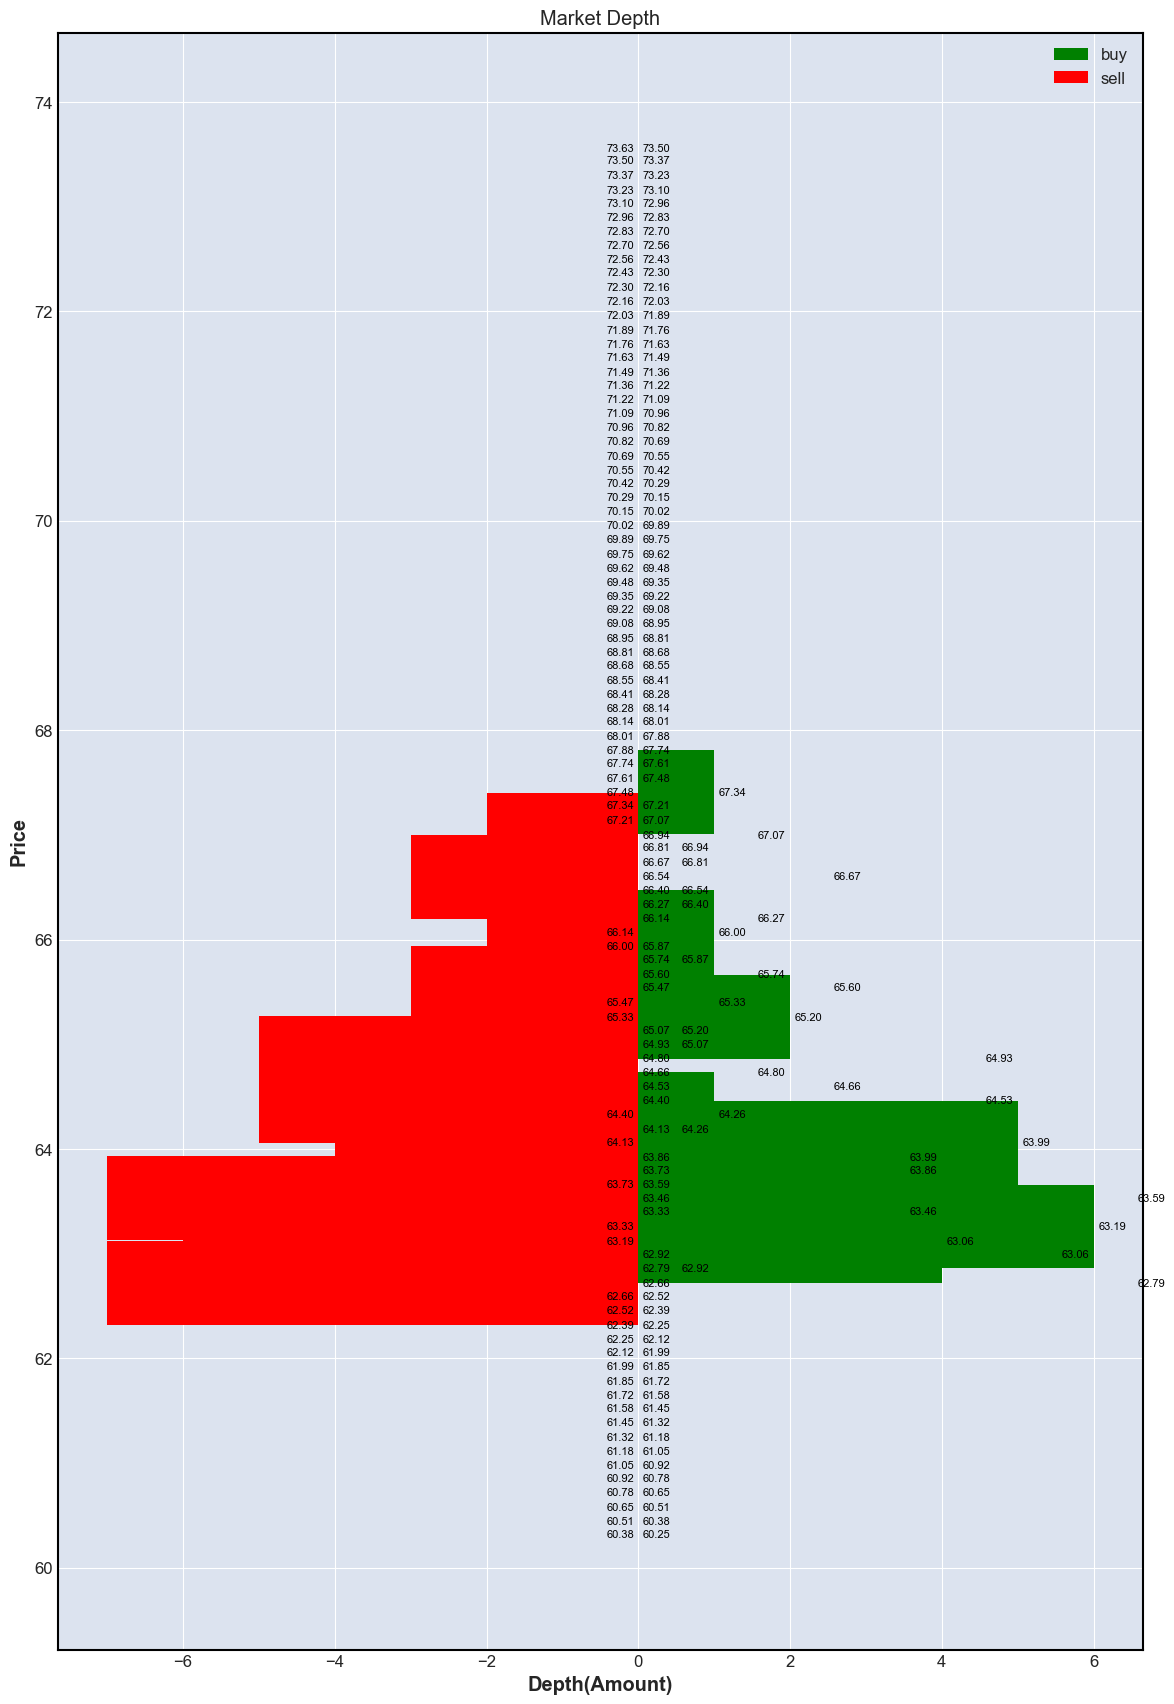

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [62.66, 62.79) │ 6163   │ -7   │ 62.72 │ 62.66    │ 62.79    │ 0        │ -7       │
│ [62.79, 62.92) │ 27517  │ -1   │ 62.86 │ 62.79    │ 62.92    │ 0        │ -1       │
│ [62.92, 63.06) │ 13562  │ -6   │ 62.99 │ 62.92    │ 63.06    │ 0        │ -6       │
│ [63.06, 63.19) │ 15908  │ 4    │ 63.12 │ 63.06    │ 63.19    │ 4        │ 0        │
│ [63.19, 63.33) │ 18156  │ 6    │ 63.26 │ 63.19    │ 63.33    │ 6        │ 0        │
│ [63.33, 63.46) │ 22684  │ -4   │ 63.4  │ 63.33    │ 63.46    │ 0        │ -4       │
│ [63.46, 63.59) │ 18113  │ -7   │ 63.53 │ 63.46    │ 63.59    │ 0        │ -7       │
│ [63.73, 63.86) │ 17297  │ -4   │ 63.8  │ 63.73    │ 63.86    │ 0        │ -4       │
│ [63.86, 63.99) │ 16349  │ -4   │ 63.92 │ 63.86    │ 63.99    │ 0        │ -4       │
│ [63.99, 64.13) │ 22369  │ 5    │ 64.06 │ 63.99    │ 64.13    │ 5        │ 0        │
│ [64.13, 64.26) │ 5782   │ -1   │ 64.19 │ 64.13    │ 64.26    │ 0        │ -1       │
│ [64.26, 64.4)  │ 1898   │ 1    │ 64.33 │ 64.26    │ 64.4     │ 1        │ 0        │
│ [64.4, 64.53)  │ 3723   │ -5   │ 64.46 │ 64.4     │ 64.53    │ 0        │ -5       │
│ [64.53, 64.66) │ 5291   │ -3   │ 64.6  │ 64.53    │ 64.66    │ 0        │ -3       │
│ [64.66, 64.8)  │ 5279   │ -2   │ 64.73 │ 64.66    │ 64.8     │ 0        │ -2       │
│ [64.8, 64.93)  │ 3071   │ -5   │ 64.87 │ 64.8     │ 64.93    │ 0        │ -5       │
│ [64.93, 65.07) │ 17103  │ -1   │ 65.0  │ 64.93    │ 65.07    │ 0        │ -1       │
│ [65.07, 65.2)  │ 12211  │ -1   │ 65.13 │ 65.07    │ 65.2     │ 0        │ -1       │
│ [65.2, 65.33)  │ 1877   │ 2    │ 65.26 │ 65.2     │ 65.33    │ 2        │ 0        │
│ [65.33, 65.47) │ 2153   │ 1    │ 65.4  │ 65.33    │ 65.47    │ 1        │ 0        │
│ [65.47, 65.6)  │ 1918   │ -3   │ 65.54 │ 65.47    │ 65.6     │ 0        │ -3       │
│ [65.6, 65.74)  │ 7960   │ -2   │ 65.67 │ 65.6     │ 65.74    │ 0        │ -2       │
│ [65.74, 65.87) │ 4280   │ -1   │ 65.81 │ 65.74    │ 65.87    │ 0        │ -1       │
│ [66.0, 66.14)  │ 9288   │ 1    │ 66.07 │ 66.0     │ 66.14    │ 1        │ 0        │
│ [66.14, 66.27) │ 2404   │ -2   │ 66.2  │ 66.14    │ 66.27    │ 0        │ -2       │
│ [66.27, 66.4)  │ 3212   │ -1   │ 66.34 │ 66.27    │ 66.4     │ 0        │ -1       │
│ [66.4, 66.54)  │ 928    │ -1   │ 66.47 │ 66.4     │ 66.54    │ 0        │ -1       │
│ [66.54, 66.67) │ 2217   │ -3   │ 66.6  │ 66.54    │ 66.67    │ 0        │ -3       │
│ [66.67, 66.81) │ 9247   │ -1   │ 66.74 │ 66.67    │ 66.81    │ 0        │ -1       │
│ [66.81, 66.94) │ 11786  │ -1   │ 66.88 │ 66.81    │ 66.94    │ 0        │ -1       │
│ [66.94, 67.07) │ 19510  │ -2   │ 67.0  │ 66.94    │ 67.07    │ 0        │ -2       │
│ [67.34, 67.48) │ 1830   │ 1    │ 67.41 │ 67.34    │ 67.48    │ 1        │ 0        │
└────────────────┴────────┴──────┴───────┴──────────┴──────────┴──────────┴──────────┘

金健米业-周期：daily
              日期    股票代码     开盘     收盘     最高     最低     成交量          成交额  \
0     1998-05-06  600127  16.61  17.05  17.30  16.01  301517  506241000.0   
1     1998-05-07  600127  17.10  16.65  17.47  16.49   89043  150529000.0   
2     1998-05-08  600127  16.66  16.78  17.04  16.00   59061   97772000.0   
3     1998-05-11  600127  16.90  15.80  16.90  15.55   55894   89285000.0   
4     1998-05-12  600127  15.65  15.15  15.65  15.01   25683   39051000.0   
...          ...     ...    ...    ...    ...    ...     ...          ...   
6291  2024-11-12  600127   7.29   7.21   7.36   7.15  314320  228321007.0   
6292  2024-11-13  600127   7.17   7.16   7.27   7.06  184947  132160982.0   
6293  2024-11-14  600127   7.12   7.07   7.25   7.06  169456  120842784.0   
6294  2024-11-15  600127   7.09   7.00   7.13   7.00  143442  101125754.0   
6295  2024-11-18  600127   6.99   6.97   7.04   6.86   58658   40693209.0   

         振幅     涨跌幅    涨跌额    换手率  
0     24.34  221.70  11.7

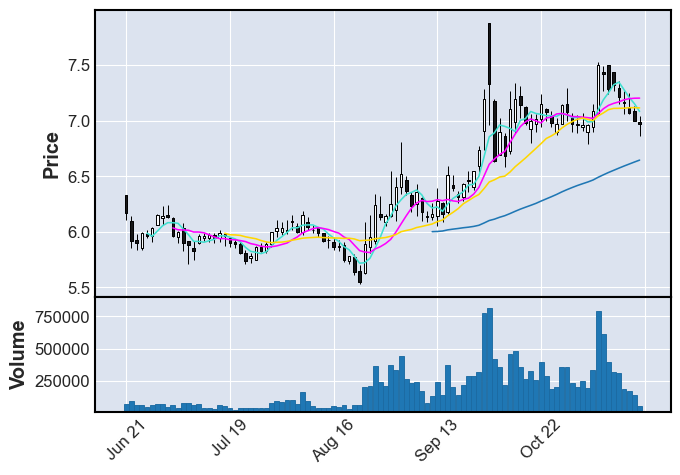

金健米业-周期：weekly
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     1998-05-08  600127  16.61  16.78  17.47  16.00   449621  7.545420e+08   
1     1998-05-15  600127  16.90  15.80  16.90  14.71   147560  2.285610e+08   
2     1998-05-22  600127  15.97  15.35  15.98  14.79    57615  8.796200e+07   
3     1998-05-29  600127  15.30  15.10  15.30  14.75    57353  8.580000e+07   
4     1998-06-05  600127  15.10  15.75  15.99  14.85    78150  1.213190e+08   
...          ...     ...    ...    ...    ...    ...      ...           ...   
1324  2024-10-25  600127   6.97   6.97   7.24   6.87  1326349  9.327762e+08   
1325  2024-11-01  600127   6.97   6.96   7.29   6.89  1401498  9.871292e+08   
1326  2024-11-08  600127   6.90   7.28   7.53   6.79  2333076  1.689682e+09   
1327  2024-11-15  600127   7.44   7.00   7.44   7.00  1131587  8.166796e+08   
1328  2024-11-18  600127   6.99   6.97   7.04   6.86    58658  4.069321e+07   

         振幅     涨跌幅    涨跌额    换手率  


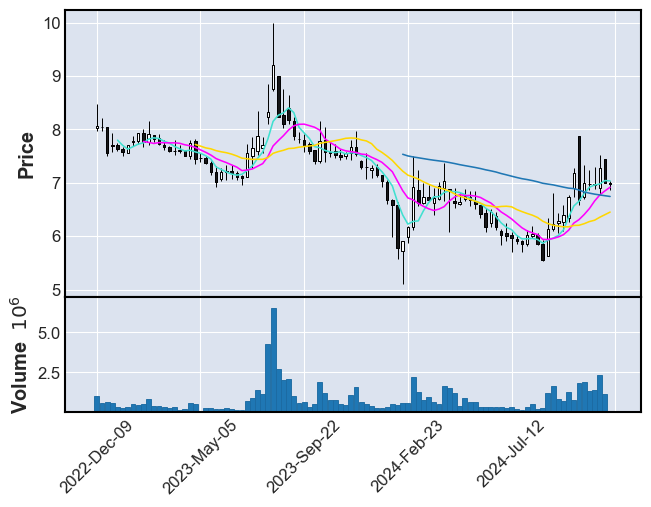

金健米业-周期：monthly
             日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0    1998-05-29  600127  16.61  15.10  17.47  14.71   712149  1.156865e+09   
1    1998-06-30  600127  15.10  15.23  16.28  14.85   240145  3.752130e+08   
2    1998-07-31  600127  15.50  13.85  15.60  13.69    82955  1.209500e+08   
3    1998-08-31  600127  13.80  12.32  13.90  10.03   125245  1.490980e+08   
4    1998-09-30  600127  12.50  12.70  13.66  12.10   137591  1.769740e+08   
..          ...     ...    ...    ...    ...    ...      ...           ...   
313  2024-07-31  600127   6.06   6.00   6.24   5.71  1205052  7.163113e+08   
314  2024-08-30  600127   6.01   6.14   6.34   5.53  2447643  1.475889e+09   
315  2024-09-30  600127   6.14   7.19   7.28   6.05  5257206  3.410523e+09   
316  2024-10-31  600127   7.88   6.97   7.88   6.58  6182459  4.368805e+09   
317  2024-11-18  600127   6.94   6.97   7.53   6.79  3774498  2.722902e+09   

        振幅     涨跌幅   涨跌额     换手率  
0    52.08  

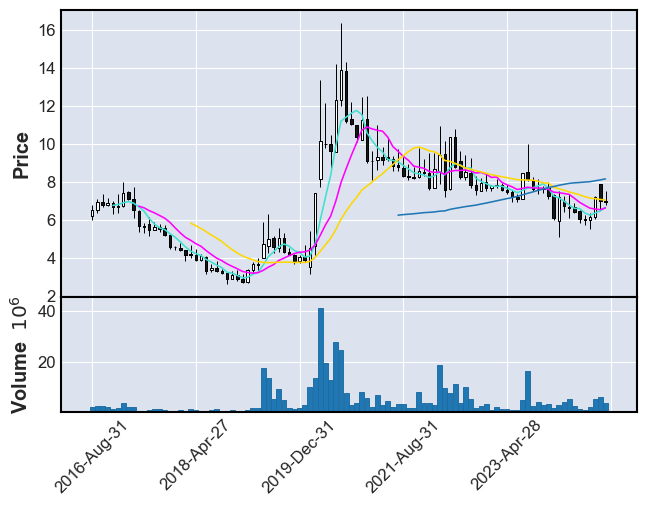

金健米业（600127）的市场深度：
市场深度：300339


KeyboardInterrupt: 

In [42]:
stockCharts,marketDepths={},{}

for f in focusStocks:
    print('='*75)
    stockCharts[f]=plotDcStocks(f,periods)
    stockname=stockCharts[f]['name']
    print(f'{stockname}（{f}）的市场深度：')
    marketDepths[f]=plotActiveMarketDepth(f)
    

In [65]:
stock_bid_ask_em_df = ak.stock_bid_ask_em(symbol="600839")
stock_bid_ask_em_df

,item,value
0,sell_5,-
1,sell_5_vol,----------------------------------------------...
2,sell_4,-
3,sell_4_vol,----------------------------------------------...
4,sell_3,-
5,sell_3_vol,----------------------------------------------...
6,sell_2,-
7,sell_2_vol,----------------------------------------------...
8,sell_1,13.24
9,sell_1_vol,12938700
